# Archives and packages needed

In [1]:
version #4.0.3

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     

### Packages needed

In [2]:
#Ignore warnings
options(warn=-1)

In [3]:
library(tidyverse)
library(readxl)
library(haven)
library(ggpubr)
library(psych)
library(MASS)
library(dplyr)
library(ggsignif)
library(ggplot2)
library(ggpubr)
library(stringr)
library(scales) #below the function that allows to put in log the scales:
ks <- function (x) { number_format(accuracy = 1,
                                   scale = 1/1000,
                                   suffix = "k",
                                   big.mark = ",")(x) }
library(epitools)
library(vtable)
library(janitor) #to exec Gemma's function
library(broom) #to exec Gemma's function
library(sjPlot) #show tables for regressions with ORs
library(corrplot)
library(GGally)
dodge = position_dodge(width=0.1)
library(Hmisc)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha



Attaching package: 'scales'


The following objects are masked from 'package:psych':

    alpha, rescale


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor


Loading required package: kableExtra


Attaching package: 'kableExtra'


The following object is masked from 'package:dplyr':

    group_rows



Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test




In [4]:
#Adjust function by Gemma Ruiz-Olalla i Miquel Vázquez
# '@export

chmi.stat.p_adjust <- function(
  phen,
  method = c('holm', 'hochberg', 'hommel', 'bonferroni', 'BH', 'BY',  'fdr', 'none'),
  arrange_by = c('raw_pval', 'adjust_pval'),
  trend = FALSE,
  stat = c('Hmisc'))
{
## nc == no converge
## np == no perform test
## ns == no signifincant

### argument 'stat'
  stat <- match.arg(stat, c('Hmisc'))

### update dataset with 'raw_pval' and 'adjust_pval'
  if('raw_pval' %in% names(phen)) {
    phen <- phen %>%
      mutate(
        raw_pval_text = factor(
          ifelse(is.nan(raw_pval), 'nc',
          ifelse(is.na(raw_pval), 'np',
          ifelse(raw_pval <= 0.0001, 'P < 0.0001',
          ifelse(raw_pval <= 0.001, 'P < 0.001',
          ifelse(raw_pval <= 0.05, paste0('P = ', round(raw_pval, 3)), 'ns')))))),
        raw_pval_signif = factor(
          ifelse(is.nan(raw_pval), 'nc',
          ifelse(is.na(raw_pval), 'np',
          ifelse(raw_pval <= 0.0001, '***',
          ifelse(raw_pval <= 0.001, '**',
          ifelse(raw_pval <= 0.01, '*',
          ifelse(raw_pval <= 0.05, '.', 'ns'))))))),
        adj_pval = as.numeric(
          ifelse(is.na(raw_pval), 'NA', p.adjust(raw_pval, method = method))),
        adj_pval_text = factor(
          ifelse(is.nan(adj_pval), 'nc',
          ifelse(is.na(adj_pval), 'np',
          ifelse(adj_pval <= 0.0001, 'P < 0.0001',
          ifelse(adj_pval <= 0.001, 'P < 0.001',
          ifelse(adj_pval <= 0.05, paste0('P = ', round(adj_pval, 3)), 'ns')))))),
        adj_pval_signif = factor(
          ifelse(is.nan(adj_pval), 'nc',
          ifelse(is.na(adj_pval), 'np',
          ifelse(adj_pval <= 0.0001, '***',
          ifelse(adj_pval <= 0.001, '**',
          ifelse(adj_pval <= 0.01, '*',
          ifelse(adj_pval <= 0.05, '.', 'ns'))))))))

        ### argument 'trend'
          if (trend == TRUE) {
            phen <- phen %>%
             mutate(
              raw_pval_text = factor(
                ifelse(is.nan(raw_pval), 'nc',
                ifelse(is.na(raw_pval), 'np',
                ifelse(raw_pval <= 0.0001, 'P < 0.0001',
                ifelse(raw_pval <= 0.001, 'P < 0.001',
                ifelse(raw_pval <= 0.05, paste0('P = ', round(raw_pval, 3)), 'ns')))))),
              raw_pval_signif = factor(
                ifelse(is.nan(raw_pval), 'nc',
                ifelse(is.na(raw_pval), 'np',
                ifelse(raw_pval <= 0.0001, '***',
                ifelse(raw_pval <= 0.001, '**',
                ifelse(raw_pval <= 0.01, '*',
                ifelse(raw_pval <= 0.05, '.', 'ns'))))))),
              adj_pval = as.numeric(
                ifelse(is.na(raw_pval), 'NA', p.adjust(raw_pval, method = method))),
              adj_pval_text = factor(
                ifelse(is.nan(adj_pval), 'nc',
                ifelse(is.na(adj_pval), 'np',
                ifelse(adj_pval <= 0.01, 'P < 0.01',
                ifelse(adj_pval <= 0.05, 'P < 0.05',
                ifelse(adj_pval <= 0.1, paste0('P = ', round(adj_pval, 3)), 'ns')))))),
              adj_pval_signif = factor(
                ifelse(is.nan(adj_pval), 'nc',
                ifelse(is.na(adj_pval), 'np',
                ifelse(adj_pval <= 0.01, '***',
                ifelse(adj_pval <= 0.05, '**',
                ifelse(adj_pval <= 0.1, '*', 'ns')))))))
        }
    } else {
     phen <- phen %>%
      mutate(
        adj_pval_text = factor(
          ifelse(is.nan(adj_pval), 'nc',
          ifelse(is.na(adj_pval), 'np',
          ifelse(adj_pval <= 0.0001, 'P < 0.0001',
          ifelse(adj_pval <= 0.001, 'P < 0.001',
          ifelse(adj_pval <= 0.05, paste0('P = ', round(adj_pval, 3)), 'ns')))))),
        adj_pval_signif = factor(
          ifelse(is.nan(adj_pval), 'nc',
          ifelse(is.na(adj_pval), 'np',
          ifelse(adj_pval <= 0.0001, '***',
          ifelse(adj_pval <= 0.001, '**',
          ifelse(adj_pval <= 0.01, '*',
          ifelse(adj_pval <= 0.05, '.', 'ns'))))))))
    }


### argument 'arrange_by'
  if('raw_pval' %in% names(phen) & arrange_by == 'raw_pval') {
    phen <- phen %>% arrange(raw_pval)

  } else if (arrange_by == 'adjust_pval') {
    phen <- phen %>% arrange(adj_pval)
  }


### return
  return(phen)
}



# Load function by Gemma Ruiz-Olalla i Miquel Vázquez to have coeficients from regression models as %

chmi.stat.lm_beta <- function(
phen,
l_group,
l_varsy, l_varsx,
    custom_formls = FALSE, #if we want to customize the model formulas. By default we don't.
    formls = NULL, #list of customized models (one per each 5 isotypes). By default, NULL.
    arg_multivar = c('univariate', 'multivariate'),
    arg_info_model = c('r_squared', 'adj_r_squared', 'sigma', 't_value', 'p_value',
      'df', 'log_lik', 'aic', 'bic', 'deviance', 'df_residual', 'NULL'),
    arg_info_beta = c('std_error' , 't_value_beta', 'NULL'),
    arg_filter_vars,
    gr_adj, #variables to group by for p.adjusting purposes (optional argument)
format_pval = TRUE,
    arg_pval_arrange = c('raw_pval', 'adjust_pval'),
    padj_method = c('holm', 'hochberg', 'hommel', 'bonferroni', 'BH', 'BY',  'fdr', 'none'),
    stat = c('janitor', 'broom', 'tidymodels',  'tidyverse'))
{
### stat
  stat <- match.arg(stat, c('janitor', 'broom', 'tidymodels', 'tidyverse'))

  # list of formulas
  l_formulas <- list()

  if(custom_formls == FALSE){

  ### loop for `l_varsy` & `l_varsx`
    if(arg_multivar == 'univariate'){
      # univariate
      for(j in l_varsy) {
      for(i in l_varsx) {
         forms <- paste0(j, ' ~ ', i)

        l_formulas[[length(l_formulas) + 1]] = forms
      }

      }

    } else if (arg_multivar == 'multivariate'){
      # multivariate
        for(j in l_varsy) {
        for(i in l_varsx) {
          forms <- paste0(j, ' ~ ', paste0(unlist(l_varsx, i), collapse = ' + '))
        }
       l_formulas[[length(l_formulas) + 1]] = forms
      }
    }

phen_1 <- phen %>%
     dplyr::select(l_group, l_varsy, l_varsx) %>%
     group_by_at(l_group) %>%
     group_nest() %>%
     slice(rep(1:n(), each = length(l_formulas))) %>%
     arrange_at(all_of(l_group)) %>%
     mutate(l_forms = unlist(rep(l_formulas, times = dim(unique(phen[, l_group]))[1])))


  }

    else if(custom_formls == TRUE){

        l_formulas <- formls

        phen_1 <- phen %>%
             dplyr::select(l_group, l_varsy, l_varsx) %>%
         arrange_at(l_group) %>%
                  group_by(ig) %>% #He canviat 'isotype' per 'ig'
                  group_nest() %>%
                  mutate(l_forms = rep(l_formulas)) %>% #first we put the corresponding formula per isotype
                  unnest(cols = data) %>%
                  group_by_at(l_group) %>% #and finally we arrange the data so that it looks like when we
                  #don't have customized formulas
                  group_nest() %>%
                  mutate(l_form = map(data, ~list(.x$l_forms)),
                         l_forms = map(l_form, ~ .x[[1]][[1]])) %>%
                  dplyr::select(-l_form)

    }

### extract whole summary of 'lm' models

      phen_1 <- phen_1 %>%
                mutate(l_mods = map2(data, l_forms,
                        ~ try(lm(formula = as.formula(.y), data = .x, model = TRUE))),
                       smry_model = map(l_mods, ~ janitor::clean_names(broom::glance(.x), case = 'snake')),
                       smry_beta = map(l_mods, ~ janitor::clean_names(broom::tidy(.x), case = 'snake')),
                       ci_lower = map(l_mods, ~ tibble::as_tibble(confint(.x, level = .95))[, 1]),
                       ci_upper = map(l_mods, ~ tibble::as_tibble(confint(.x, level = .95))[, 2])) %>%
                dplyr::select(-data, -l_mods) %>%
                unnest(cols = c('l_forms', 'smry_model', 'smry_beta', 'ci_lower', 'ci_upper'),
                       names_repair = ~ tidyr_legacy(., sep = '_')) %>% ## '_1' fix 'data_beta' info for 'statistic' & 'p_value'
                filter(!str_detect(term, 'Intercept')) %>%
                dplyr::select(everything(),
                       t_value = statistic,
                       beta = estimate, vars_x = term, t_value_beta = statistic_1, raw_pval = p_value_1,
                       ci_lower = starts_with('2.5') , ci_upper = starts_with('97.5')) %>%
                separate(l_forms, c('vars_y', 'rest'), sep = ' ~ ', remove = TRUE) %>%
                mutate_at(vars(c('vars_y', 'vars_x')), as.factor) %>%
                dplyr::select(-rest)


### argument 'arg_filter_vars'
  if(!missing(arg_filter_vars)) {
  # update 'data'
    phen_1 <- phen_1 %>%
      filter(str_detect(vars_x, pattern = paste(arg_filter_vars, collapse = '|')))
  }

# list of variables to choose
l_vars <- c(l_group, 'vars_y', 'vars_x', 'beta', 'ci_lower', 'ci_upper', 'raw_pval')
l_vars_arg <- c(l_vars, arg_info_model, arg_info_beta)

### update 'data'
  phen_1 <- phen_1 %>%
    dplyr::select(one_of(l_vars_arg))


### argument 'format_pval'
if(format_pval == TRUE & !missing(padj_method)) {

        #if `gr_adj` is not missing, the adjust will be made grouping by such variables
        if(!missing(gr_adj)){
        phen_1 <- phen_1 %>%
                  group_by_at(gr_adj) %>%
                  group_nest() %>%
                  mutate(adj_data = map(data,
                      ~ chmi.stat.p_adjust(phen = .x, method = padj_method, arrange_by = arg_pval_arrange))) %>%
                  dplyr::select(-data) %>%
                  unnest(cols = adj_data) %>%
                  arrange(raw_pval)

        }else{
        phen_1 <- chmi.stat.p_adjust(phen = phen_1, method = padj_method, arrange_by = arg_pval_arrange) %>%
             mutate_at(vars(c('adj_pval_text', 'adj_pval_signif')), as.factor)
                  }
  }

  # return
  return(phen_1)
}



#' @export
new_covidcat.beta_transform <- function(mod_results_phen)
{

mod_results_phen <- mod_results_phen %>%
                    #this below is all for log-linear interpretation (both numeric and categorical variables)
                    mutate(beta_transform_unit = 10^beta,
                           beta_transform_percent = (beta_transform_unit-1)*100,
                           ci_lower_transform_unit = 10^ci_lower,
                           ci_lower_transform_percent = (ci_lower_transform_unit-1)*100,
                           ci_upper_transform_unit = 10^ci_upper,
                           ci_upper_transform_percent = (ci_upper_transform_unit-1)*100)

### return
  return(mod_results_phen)
}

### Archives needed

- Cizur_data_20200626_clean_final0804.csv
- Serologias Encuesta Navarra FINAL.xlsx
- Controls negatius bombers_total.xls
- 20200810_lab_results.dta

### Index

1. Frequency of start of symptoms across time

2. Detection and overlap of antibodies against S and RBD antigens

    4.1 Description of frequency of detection of Ab against S and/or RBD
    
    4.2 Multiple linear regression with log10 mfi of Ig-Ag as outcome (Gemma RO's code)
    
3. Multiple logistic regression to assess associations between variables and being seropositive for each Ag

4. Multiple logistic regression to assess associations between variables and being seropositive for each Ig

5. Occupation and Economic impact

6. Exposures

In [5]:
# Set your own working directory
setwd("C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/Open Code Navarra/")

### Load databases

5 participants out of the 733 don't have lab info. They are the studyn 319, 1077, 325, 688, 981 (which was not even sent or received by the lab).

2 samples from the lab do not have studyn:

952: the questionaire was never sent by the sowftware

SNAV999: it corresponds to participant 688, although in the questionaire it was written as 935

In [18]:
#comes from the redcap database cleaned by Julia Montanya:
dta<-read.csv("Cizur_data_20200626_clean_final0804.csv")

#Ig results from the lab (original archive, contains the NC):
all_lab<-read_xlsx("Serologias Encuesta Navarra FINAL.xlsx") 

#Comes from the lab database put into wide in excel and then used in STATA:
lab<-read_dta("20200810_lab_results.dta")

    lab$Global_posneg<- replace(lab$Global_posneg,which(lab$Global_posneg=="indet"), "pos") #Cause in the end they were not indets
    #table(lab$Global_posneg)
    # neg pos 
    # 673  56 

    lab<-lab%>%
    rename(RBD_IgG_posneg=RBG_IgG_posneg,
          RBD_IgM_posneg=RBG_IgM_posneg,
          RBD_IgA_posneg=RBG_IgA_posneg,
          Spike_IgG=SpikeIgG)

    lab$S_IgM_posneg<-as.factor(lab$S_IgM_posneg)
    lab$RBD_IgM_posneg<-as.factor(lab$RBD_IgM_posneg)
    lab$IgM_posneg<-as.factor(lab$IgM_posneg)
    lab$S_IgG_posneg<-as.factor(lab$S_IgG_posneg)
    lab$RBD_IgG_posneg<-as.factor(lab$RBD_IgG_posneg)
    lab$IgG_posneg<-as.factor(lab$IgG_posneg)
    lab$S_IgA_posneg<-as.factor(lab$S_IgA_posneg)
    lab$RBD_IgA_posneg<-as.factor(lab$RBD_IgA_posneg)
    lab$IgA_posneg<-as.factor(lab$IgA_posneg)
    lab$Global_posneg<-as.factor(lab$Global_posneg)

    #Change to numeric (first change decimal commas to points)
    lab$Spike_IgM<- sub(",",".",lab$Spike_IgM)
    lab$Spike_IgM<-as.numeric((lab$Spike_IgM),digits=10)
    lab$RBD_IgM<- sub(",",".",lab$RBD_IgM)
    lab$RBD_IgM<-as.numeric((lab$RBD_IgM),digits=10)
    lab$Spike_IgG<- sub(",",".",lab$Spike_IgG)
    lab$Spike_IgG<-as.numeric((lab$Spike_IgG),digits=10)
    lab$RBD_IgG<- sub(",",".",lab$RBD_IgG)
    lab$RBD_IgG<-as.numeric((lab$RBD_IgG),digits=10)
    lab$Spike_IgA<- sub(",",".",lab$Spike_IgA)
    lab$Spike_IgA<-as.numeric((lab$Spike_IgA),digits=10)
    lab$RBD_IgA<- sub(",",".",lab$RBD_IgA)
    lab$RBD_IgA<-as.numeric((lab$RBD_IgA),digits=10)
   
#Controls (original archive):
controls<-read_xls("Controls negatius bombers_total.xls")

##### ddbb will contain all variables created so that they are readily accessible

In [19]:
#Merge redcap data and lab data for general use
ddbb<-merge(dta,lab, by = "lab_sample_grouplab_sample_id", all=TRUE)

#Many cells with empty spaces, we transform them into NAs
ddbb <- ddbb %>%
  mutate(across(where(is.character), ~ na_if(.,""))) #Only in character vars

#For the variable (socioecon_groupeducation) some options were lacking, so I create the PhD variable and "School" and re-atribute some that were manually written on "other" but only for those older than 20 y/o
ddbb$socioecon_groupeducation[ddbb$studyn==142 | ddbb$studyn==194 | ddbb$studyn==277 | ddbb$studyn==305 | ddbb$studyn==326 | ddbb$studyn==333 | ddbb$studyn==344 | ddbb$studyn==375 | ddbb$studyn==381 | ddbb$studyn==436 | ddbb$studyn==623 | ddbb$studyn==684 | ddbb$studyn==755 | ddbb$studyn==759 | ddbb$studyn==833 | ddbb$studyn==853 | ddbb$studyn==856 |ddbb$studyn==899 | ddbb$studyn==983 | ddbb$studyn==1070]<-"PhD"
ddbb$socioecon_groupeducation[ddbb$studyn==49 | ddbb$studyn==289 | ddbb$studyn==335 | ddbb$studyn==376]<-"university_degree"
ddbb$socioecon_groupeducation[ddbb$studyn==33 | ddbb$studyn==418 | ddbb$studyn==431 | ddbb$studyn==533 | ddbb$studyn==573 | ddbb$studyn==574  | ddbb$studyn==590 | ddbb$studyn==593 | ddbb$studyn==724 | ddbb$studyn==748 | ddbb$studyn==766 | ddbb$studyn==847 | ddbb$studyn==1035 | ddbb$studyn==1140]<-"secondary_education"
ddbb$socioecon_groupeducation[ddbb$studyn==614]<-"technical_formacion_profesional"
ddbb$socioecon_groupeducation[ddbb$studyn==205 | ddbb$studyn==419 | ddbb$studyn==994 | ddbb$studyn==1198]<-"school"

#Add variables to Put into factor:
cols<-c('participantsex', 'ageg','puebloconcejo','symptom_groupcovid_yn','symptom_groupfever_37','symptom_groupfever_38','symptom_groupchills','symptom_groupfatigue','symptom_groupmuscle_ache','symptom_groupsore_throat','symptom_grouplost_smell','symptom_grouplost_taste','symptom_groupcough','symptom_grouprunny_nose','symptom_groupshort_breath','symptom_groupdyspnea','symptom_groupwheeze',
        'symptom_groupchest_pain','symptom_groupother_resp','symptom_groupheadache','symptom_groupnausea','symptom_groupab_pain','symptom_groupdairrhea','symptom_groupexpectorations','symptom_questions_groupsymptom_m','symptom_questions_groupsymptom_w','symptom_questions_groupsymptom_h','symptom_questions_groupsymptom_v','other_hh_covid_confirmed_groupot',
        'other_hh_covid_suspected_groupot','risk_factors_groupsuffering_dise','risk_factors_grouptaking_medicat','risk_factors_groupblood_group','risk_factors_groupbcg_vac','risk_factors_groupflu_vac','risk_factors_groupflu_yn', 'risk_factors_groupcold_yn','risk_factors_groupsmoker_yn','socioecon_groupeducation','socioecon_groupeducation_other','socioecon_groupoccupation',
        'socioecon_groupemployed_yn','socioecon_groupemployed_before_y','socioecon_groupjob_loss_covid','socioecon_groupsalary_mode','socioecon_groupcovid_affect_fina','socioecon_groupstruggle_expenses','exposures_groupsanitary_centre','exposures_groupsanitary_centre_r','exposures_groupsanitary_accompan','exposures_groupsanitary_symptoms','exposures_groupsanitary_incompat',
        'exposures_groupdiagnosed_covid','exposures_groupplaces_visited','exposures_groupsupermarket_pre','exposures_groupgrocery_pre','exposures_groupbank_pre','exposures_groupchurch_pre','exposures_grouphairdresser_pre','exposures_grouppamplona_pre','exposures_groupmadrid_pre','exposures_groupother_spain_pre','exposures_groupoutside_spain_pre','exposures_groupplaces_visited_su',
        'exposures_groupcontact_covid','exposures_groupcontact_covid_rel','exposures_groupcontact_covid_pro','perceptions_groupinfo_source','perceptions_groupcovid_transmit','perceptions_groupcovid_prevent','perceptions_groupcovid_info_rece')
ddbb[cols]<-lapply(ddbb[cols],factor)

#Add variables to Put into date format:
cols<-c('participantdob','symptom_groupcovid_date_diagnose','symptom_groupfever_37__start','symptom_groupfever_37_end','symptom_groupfever_38__start','symptom_groupfever_38_end', 'symptom_groupchills_start','symptom_groupchills_end','symptom_groupfatigue_start','symptom_groupfatigue_end','symptom_groupmuscle_ache_start','symptom_groupmuscle_ache_end',
       'symptom_groupsore_throat_start','symptom_groupsore_throat_end','symptom_grouplost_smell_start','symptom_grouplost_smell_end','symptom_grouplost_taste_start','symptom_grouplost_taste_end','symptom_groupcough_start','symptom_groupcough_end','symptom_grouprunny_nose_start','symptom_grouprunny_nose_end','symptom_groupshort_breath_start','symptom_groupshort_breath_end',
       'symptom_groupdyspnea_start','symptom_groupdyspnea_end','symptom_groupwheeze_start','symptom_groupwheeze_end','symptom_groupchest_pain_start','symptom_groupchest_pain_end','symptom_groupother_resp_start','symptom_groupother_resp_end','symptom_groupheadache_start','symptom_groupheadache_end','symptom_groupnausea_start','symptom_groupnausea_end',
       'symptom_groupexpectorations_star','symptom_groupexpectorations_end','symptom_groupdairrhea_start','symptom_groupdairrhea_end','risk_factors_groupflu_end_date','risk_factors_groupcold_end_date','socioecon_groupwork_last_day','exposures_groupsanitary_work_dat','exposures_groupsanitary_other_da','exposures_groupsupermarket_date','exposures_groupgrocery_date','exposures_groupbank_date',
       'exposures_groupchurch_date','exposures_grouphairdresser_date','exposures_grouppamplona_date','exposures_groupmadrid_date','exposures_groupother_spain_date','exposures_groupoutside_spain_dat','exposures_groupcontact_covid_dat','symptom_groupab_pain_start')
ddbb[cols]<-(lapply(ddbb[cols],as.Date,"%Y-%m-%d"))

#symptom_questions_groupsymptom_m = Did any of these symptoms require you to seek medical attention?
#symptom_questions_groupsymptom_w = Did any of these symptoms require you to miss work or school?
#symptom_questions_groupsymptom_h = Did any of these symptoms require you to be hospitalized?
#symptom_questions_groupsymptom_v = Did any of these symptoms require you to get ventilation?

#I create the variable S_pos:
ddbb<-ddbb%>%
mutate(S_pos=as.factor(ifelse((S_IgM_posneg=="pos"|S_IgG_posneg=="pos"|S_IgA_posneg=="pos"),1,0)))

#I create the variable RBD_pos:
ddbb<-ddbb%>%
mutate(RBD_pos=as.factor(ifelse((RBD_IgM_posneg=="pos"|RBD_IgG_posneg=="pos"|RBD_IgA_posneg=="pos"),1,0)))

# I create the variable body mass index:
ddbb<-ddbb%>%
 mutate(bmi=(risk_factors_groupweight/((risk_factors_groupheight)*(risk_factors_groupheight))))

# I create a variable for allergy y/n:
ddbb<-ddbb%>%
 mutate(allergy=as.factor(ifelse(grepl("allergy",risk_factors_groupsuffering_dise), "yes", "no")))

# I create a var  for autoinmune disease, manually I detect two among the seropositive: 22 has celiac disease and 968 has ulcerative colitis.
ddbb<-ddbb%>%
 mutate(autoimm_dis=as.factor(ifelse(studyn==22 | studyn==968, "yes", "no")))

# I create the variable "ratio_rbd_s" by dividing the levels of IgG-RBD by IgG-S
ddbb<-ddbb%>%
 mutate(IgG_ratio_rbd_s=(RBD_IgG/Spike_IgG),
       IgM_ratio_rbd_s=(RBD_IgM/Spike_IgM),
       IgA_ratio_rbd_s=(RBD_IgA/Spike_IgA))

# I create the variable "IgA_RBD_S" by adding up the levels of IgA-RBD by IgA-S
ddbb<-ddbb%>%
 mutate(IgA_RBD_S=(RBD_IgA+Spike_IgA))

# I create the variable "IgM_RBD_S" by adding up the levels of IgA-RBD by IgA-S
ddbb<-ddbb%>%
 mutate(IgM_RBD_S=(RBD_IgM+Spike_IgM))

# I create the variable "IgG_RBD_S" by adding up the levels of IgA-RBD by IgA-S
ddbb<-ddbb%>%
 mutate(IgG_RBD_S=(RBD_IgG+Spike_IgG))

#I Create a var time since diagnosed
ddbb<-ddbb%>%
mutate(days_since_diag= difftime(lab_sample_grouplab_sample_date ,symptom_groupcovid_date_diagnose, units="days"))

#I create a var with start of symptoms
start<-ddbb%>%
dplyr::select("studyn" | (starts_with("symptom_") & (ends_with("start") | ends_with("star"))))%>%
mutate(symp_start=pmin( symptom_groupfever_37__start,symptom_groupfever_38__start,symptom_groupchills_start,symptom_groupfatigue_start,symptom_groupmuscle_ache_start,symptom_groupsore_throat_start,symptom_grouplost_smell_start,symptom_grouplost_taste_start,symptom_groupcough_start,symptom_grouprunny_nose_start,symptom_groupshort_breath_start,symptom_groupdyspnea_start,symptom_groupwheeze_start,symptom_groupchest_pain_start,symptom_groupother_resp_start,symptom_groupheadache_start,symptom_groupnausea_start,symptom_groupab_pain_start,symptom_groupdairrhea_start,symptom_groupexpectorations_star,na.rm=TRUE))%>%
dplyr::select(studyn,symp_start)
start$symp_start[start$symp_start < as.Date("2020-02-01")] <- NA #We will consider symptoms earlier than 1st of feb as not COVID-19
ddbb<-merge(ddbb,start, by = "studyn", all=TRUE)

# Days pso
ddbb<-ddbb%>%
mutate(days_pso= difftime(lab_sample_grouplab_sample_date ,symp_start, units="days"))

# Group symptoms to have less variables on the models
ddbb<-ddbb%>%
mutate(fever=as.factor(ifelse((symptom_groupfever_37=="yes" | symptom_groupfever_38=="yes" | symptom_groupchills=="yes"), "yes", "no")))%>%
mutate(loss_taste_smell=as.factor(ifelse((symptom_grouplost_smell=="yes" | symptom_grouplost_taste=="yes"), "yes", "no")))%>%
mutate(lower_resp=as.factor(ifelse((symptom_groupcough=="yes" | symptom_groupshort_breath=="yes"| symptom_groupdyspnea=="yes"| symptom_groupexpectorations=="yes"| symptom_groupwheeze=="yes"| symptom_groupchest_pain=="yes"), "yes", "no")))%>%
mutate(upper_resp=as.factor(ifelse((symptom_groupsore_throat=="yes" | symptom_grouprunny_nose=="yes"), "yes", "no")))%>%
mutate(dige=as.factor(ifelse((symptom_groupnausea=="yes" | symptom_groupab_pain=="yes"| symptom_groupdairrhea=="yes"), "yes", "no")))%>%
mutate(ache_fatigue=as.factor(ifelse((symptom_groupfatigue=="yes" | symptom_groupmuscle_ache=="yes"| symptom_groupheadache=="yes"), "yes", "no")))

#symp yes/no
ddbb<-ddbb%>%
mutate(symp_yn=as.factor(ifelse((symptom_groupfever_37=="yes" | symptom_groupfever_38=="yes" | symptom_groupchills=="yes" |symptom_grouplost_smell=="yes" | symptom_grouplost_taste=="yes" |symptom_groupcough=="yes" | symptom_groupshort_breath=="yes"| symptom_groupdyspnea=="yes"| symptom_groupexpectorations=="yes"| symptom_groupwheeze=="yes"| symptom_groupchest_pain=="yes"|symptom_groupsore_throat=="yes" | symptom_grouprunny_nose=="yes"|symptom_groupnausea=="yes" | symptom_groupab_pain=="yes"| symptom_groupdairrhea=="yes"|symptom_groupfatigue=="yes" | symptom_groupmuscle_ache=="yes"| symptom_groupheadache=="yes"), "yes", "no")))
ddbb$symp_yn[is.na(ddbb$symp_yn)]<-"no" #change NAs to no


#Comorb
#symp yes/no
ddbb<-ddbb%>%
mutate(comorb_yn=as.factor(ifelse(!is.na(risk_factors_groupsuffering_dise), "yes", "no")))
    
#exposures y/n
ddbb<-ddbb%>%
mutate(exp_yn=as.factor(ifelse(!is.na(exposures_groupplaces_visited), "yes", "no")))

#schooling level
ddbb<-ddbb%>%
mutate(schooling=socioecon_groupeducation)
ddbb$schooling[ddbb$schooling=="masters" | ddbb$schooling=="PhD" ]<-"university_degree" #remove two categories
levels(ddbb$schooling)<-list("University degree / Master / PhD"='university_degree',"Formación profesional"="technical_formacion_profesional","Secondary education"='secondary_education',"Primary education"="school")

str(ddbb, list.len=ncol(ddbb))
options(repr.matrix.max.cols=300, repr.matrix.max.rows=734) # I set it like this so that it will display my whole data set

'data.frame':	736 obs. of  274 variables:
 $ studyn                          : int  1 3 4 5 6 8 10 11 12 13 ...
 $ lab_sample_grouplab_sample_id   : num  577 779 768 343 341 350 649 344 772 346 ...
 $ X                               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ visdate                         : chr  "2020-06-15" "2020-06-16" "2020-06-15" "2020-06-15" ...
 $ dob                             : chr  "1940-02-14" "1981-05-01" "1956-01-23" "1965-04-03" ...
 $ age                             : num  80.3 39.1 64.4 55.2 21.1 ...
 $ ageg                            : Factor w/ 5 levels "0","1","2","3",..: 5 3 4 4 3 3 4 1 2 1 ...
 $ dc_infodc_institution           : chr  "ISGlobal" "ISGlobal" "ISGlobal" "ISGlobal" ...
 $ dc_infointerview_date           : chr  "2020-06-15" "2020-06-16" "2020-06-15" "2020-06-15" ...
 $ participanthh_number            : chr  "VOI1505" "DOI1604" "FGC1504" "AEG1501" ...
 $ participantsurname              : chr  "FernÃ¡ndez SantiÃ±an" "Garcia" "Ilundain Echevarría

### Long db (isotype and antigen in columns)

In [15]:
#The ones I have to gather into long (the ones that are different for each isotype):
    #'Spike_IgM'
    #'RBD_IgM'
    #'Spike_IgG'
    #'RBD_IgG'
    #'Spike_IgA'
    #'RBD_IgA'
    #'IgA_RBD_S'
    #'IgM_RBD_S'
    #'IgG_RBD_S'
    
    #'S_IgM_posneg'
    #'RBD_IgM_posneg'
    #'S_IgG_posneg'
    #'RBD_IgG_posneg'
    #'S_IgA_posneg'
    #'RBD_IgA_posneg'

    #IgM_posneg
    #IgG_posneg
    #IgA_posneg
    #S_pos
    #RBD_pos
    
    #'ratio_rbd_s' --> IgG 

clean<-ddbb%>%
 filter(lab_sample_grouplab_sample_id!=952)%>% #we delete those ID's which are not complete
 filter(lab_sample_grouplab_sample_id!=999)%>%
 filter(studyn!=319)%>%
 filter(studyn!=1077)%>%
 filter(studyn!=325)%>%
 filter(studyn!=688)%>%
 filter(studyn!=981)
#length(unique(clean$studyn)) #727

    #First columns that are Ig-Ag-studyn specific
ddbb_long0<-clean%>%
    dplyr::select('studyn','Spike_IgM','RBD_IgM',
              'Spike_IgG','RBD_IgG',
              'Spike_IgA','RBD_IgA',
              'IgA_RBD_S','IgM_RBD_S','IgG_RBD_S')%>%
    rename(S_IgA=Spike_IgA)%>%
    rename(S_IgM=Spike_IgM)%>%
    rename(S_IgG=Spike_IgG)%>%
    rename(RBDS_IgA=IgA_RBD_S)%>%
    rename(RBDS_IgM=IgM_RBD_S)%>%
    rename(RBDS_IgG=IgG_RBD_S)%>%
    gather(ig_ag, mfi, S_IgM:RBDS_IgG)%>%
    separate(ig_ag, c("ag", "ig"), sep="_")%>%unique()
#summary(ddbb_long0)
#head(arrange(ddbb_long0, studyn))
#length(ddbb_long0$studyn)
#length(unique(ddbb_long0$studyn))

ddbb_long1<-clean%>%
    dplyr::select('studyn','S_IgM_posneg','RBD_IgM_posneg',
              'S_IgG_posneg','RBD_IgG_posneg',
              'S_IgA_posneg','RBD_IgA_posneg')%>%
    gather(ig_ag, ig_ag_posneg, S_IgM_posneg:RBD_IgA_posneg)%>%
    separate(ig_ag, c("ag", "ig"), sep="_")%>%unique()
#summary(ddbb_long1)
#head(arrange(ddbb_long1, studyn))
#length(ddbb_long1$studyn)
#length(unique(ddbb_long1$studyn))

ddbb_long<-merge(ddbb_long0, ddbb_long1, by=c('studyn','ag','ig'), all=TRUE)%>%unique
#length(ddbb_long$studyn) 
#head(arrange(ddbb_long, studyn))
#length(unique(ddbb_long$studyn))

    #Add vars specific to studyn-Ag
ddbb_long2<-clean%>%
    dplyr::select('studyn','S_pos', 'RBD_pos')%>%
    gather(ig_ag, ag_posneg, S_pos:RBD_pos)%>%
    separate(ig_ag, c("ag", "trash"), sep="_")%>%
    dplyr::select(-trash)%>%unique()
#table(ddbb_long2$ag)
#table(ddbb_long2$ag_posneg)

ddbb_long<-merge(ddbb_long, ddbb_long2, by=c('studyn','ag'), all=TRUE)%>%unique()


    #Add vars specific to studyn-Ig
ddbb_long3<-clean%>%
    dplyr::select('studyn','IgM_posneg', 'IgG_posneg', 'IgA_posneg')%>%
    gather(ig_ag, ig_posneg, IgM_posneg:IgA_posneg)%>%
    separate(ig_ag, c("ig", "trash"), sep="_")%>%
    dplyr::select(-trash)%>%unique()

ddbb_long<-merge(ddbb_long, ddbb_long3, by=c('studyn','ig'), all=TRUE)%>%unique()

ddbb_long4<-clean%>%
    dplyr::select('studyn','IgM_ratio_rbd_s', 'IgA_ratio_rbd_s', 'IgG_ratio_rbd_s')%>%
    gather(ig_ag, ratio_mfi, IgM_ratio_rbd_s:IgG_ratio_rbd_s)%>%
    separate(ig_ag, c("ig", "trash"), sep="_")%>%
    dplyr::select(-trash)%>%unique()

ddbb_long<-merge(ddbb_long, ddbb_long4, by=c('studyn','ig'), all=TRUE)%>%unique()

#summary(ddbb_long)
#head(ddbb_long)
#table(ddbb_long$ig)
#table(ddbb_long$ig_posneg)

    #Finally we bind all columns that are only studyn-specific
rest<-ddbb%>%
dplyr::select(-'Spike_IgM',-'RBD_IgM',
              -'Spike_IgG',-'RBD_IgG',
             - 'Spike_IgA',-'RBD_IgA',
              -'IgA_RBD_S',-'IgM_RBD_S',-'IgG_RBD_S',
             -'S_IgM_posneg',-'RBD_IgM_posneg',
              -'S_IgG_posneg',-'RBD_IgG_posneg',
              -'S_IgA_posneg',-'RBD_IgA_posneg',
             -'S_pos', -'RBD_pos',
             -'IgM_posneg', -'IgG_posneg', -'IgA_posneg',
             -'IgM_ratio_rbd_s',- 'IgA_ratio_rbd_s',- 'IgG_ratio_rbd_s')

ddbb_long<-merge(rest,ddbb_long, by=c('studyn'), all=TRUE)%>%unique()
length(unique(ddbb_long$studyn)) #733

#Add variables to Put into factor:
cols<-c('ig','ag','ig_ag_posneg','ag_posneg','ig_posneg')
ddbb_long[cols]<-lapply(ddbb_long[cols],factor)

#summary(ddbb_long)
#head(ddbb_long)

[1] 733

# Analysis

## 1. Frequency of start of symptoms across time

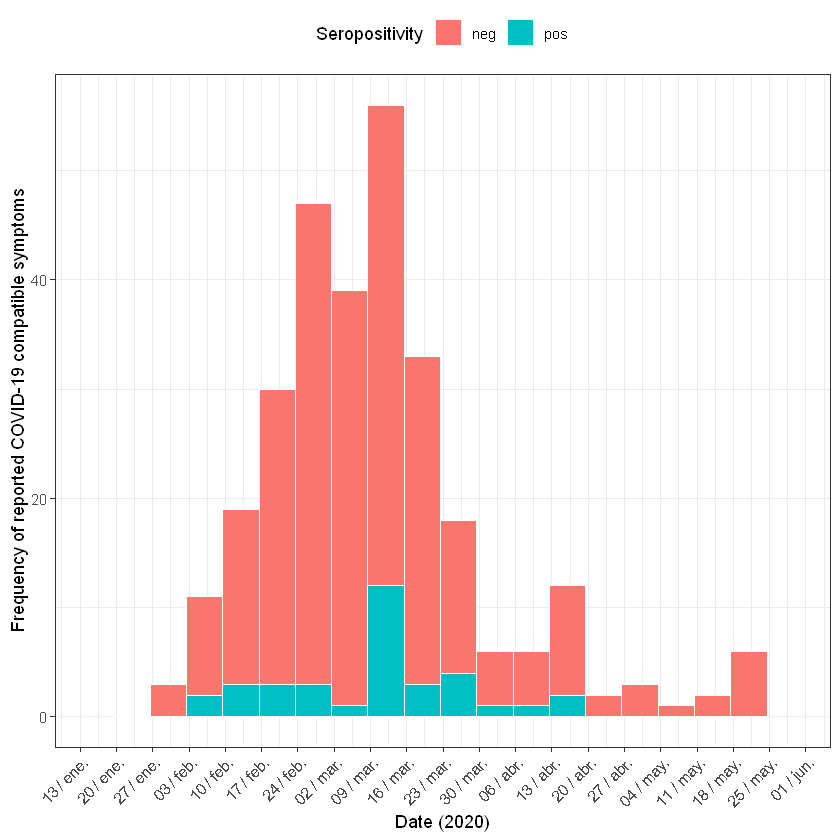

In [16]:
#Tune a bit the dataframe so that labels are nicer in the plot
fig<-ddbb%>% rename (Seropositivity=Global_posneg)

figure<-ggplot(subset(fig, !is.na(Seropositivity)), aes(x=symp_start, fill=Seropositivity)) + 
  geom_histogram(binwidth=7, colour="white")+
  theme_bw()+
  scale_x_date(labels = date_format("%d / %b"),
                 date_breaks = "1 week",
                 limits = c(as.Date("2020-01-15"), as.Date("2020-05-30"))) +
  ylab("Frequency of reported COVID-19 compatible symptoms") + xlab("Date (2020)") +
  theme_bw()+ 
  theme(axis.text.x = element_text(angle = 45,hjust=1))+
  theme(legend.position="top")
figure
#ggsave(figure, filename = "Dates of symp start.png", width = 7, height= 5)

Frequency of dates of start of reported symptoms across time among seropositive and seronegative participants: **the highest frequency was reported right before mid march and only one participant reported start of symptoms after mid april.**

## 2. Detection and overlap of antibodies against *S* and *RBD antigens*

Here we want to describe the frequency of detection of antibodies against the 2 antigens in participants and if there is any association with having one or the other. As well, we will describe the ratio levels between RBD/S.

### 2.1 Description of frequency of detection of Ab against S and/or RBD

- % of participants who were seropositive for S only
- % of participants who were seropositive for RBD only
- % of participants who were seropositive for S and RBD

#### Prepare database and see NAs

In [18]:
#summary(ddbb%>%dplyr::select("studyn",'Spike_IgM','S_IgM_posneg','RBD_IgM','RBD_IgM_posneg','IgM_posneg','Spike_IgG','S_IgG_posneg','RBD_IgG','RBD_IgG_posneg','IgG_posneg','Spike_IgA','S_IgA_posneg','RBD_IgA','RBD_IgA_posneg','IgA_posneg','Global_posneg'))
venn<-ddbb%>%dplyr::select("lab_sample_grouplab_sample_id","studyn",'Spike_IgM','S_IgM_posneg','RBD_IgM','RBD_IgM_posneg','IgM_posneg','Spike_IgG','S_IgG_posneg','RBD_IgG','RBD_IgG_posneg','IgG_posneg','Spike_IgA','S_IgA_posneg','RBD_IgA','RBD_IgA_posneg','IgA_posneg','Global_posneg')

length(unique(venn$studyn))

[1] 733

#### Calcualte percentages

In [19]:
venn.table<-ddbb%>%
 filter(studyn!=319)%>%
 filter(studyn!=1077)%>%
 filter(studyn!=325)%>%
 filter(studyn!=688)%>%
 filter(studyn!=981)%>%
 dplyr::select(S_IgM_posneg, RBD_IgM_posneg,S_IgG_posneg, RBD_IgG_posneg,S_IgA_posneg, RBD_IgA_posneg)

summary(venn.table)

st(venn.table, out="kable") #I paste the code in a new Marckdown cell
#st(regr, out="kable") #to save it in a csv

 S_IgM_posneg RBD_IgM_posneg S_IgG_posneg RBD_IgG_posneg S_IgA_posneg
 neg:715      neg:711        neg:713      neg:719        neg:702     
 pos: 12      pos: 16        pos: 14      pos:  8        pos: 25     
 RBD_IgA_posneg
 neg:718       
 pos:  9       

<table>
<caption>Summary Statistics</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Variable </th>
   <th style="text-align:left;"> N </th>
   <th style="text-align:left;"> Percent </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> S_IgM_posneg </td>
   <td style="text-align:left;"> 727 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... neg </td>
   <td style="text-align:left;"> 715 </td>
   <td style="text-align:left;"> 98.3% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... pos </td>
   <td style="text-align:left;"> 12 </td>
   <td style="text-align:left;"> 1.7% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> RBD_IgM_posneg </td>
   <td style="text-align:left;"> 727 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... neg </td>
   <td style="text-align:left;"> 711 </td>
   <td style="text-align:left;"> 97.8% </td>
  </tr>
  <tr>
   <td style="text-

<table>
<caption>Summary Statistics</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Variable </th>
   <th style="text-align:left;"> N </th>
   <th style="text-align:left;"> Percent </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> S_IgM_posneg </td>
   <td style="text-align:left;"> 727 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... neg </td>
   <td style="text-align:left;"> 715 </td>
   <td style="text-align:left;"> 98.3% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... pos </td>
   <td style="text-align:left;"> 12 </td>
   <td style="text-align:left;"> 1.7% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> RBD_IgM_posneg </td>
   <td style="text-align:left;"> 727 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... neg </td>
   <td style="text-align:left;"> 711 </td>
   <td style="text-align:left;"> 97.8% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... pos </td>
   <td style="text-align:left;"> 16 </td>
   <td style="text-align:left;"> 2.2% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> S_IgG_posneg </td>
   <td style="text-align:left;"> 727 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... neg </td>
   <td style="text-align:left;"> 713 </td>
   <td style="text-align:left;"> 98.1% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... pos </td>
   <td style="text-align:left;"> 14 </td>
   <td style="text-align:left;"> 1.9% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> RBD_IgG_posneg </td>
   <td style="text-align:left;"> 727 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... neg </td>
   <td style="text-align:left;"> 719 </td>
   <td style="text-align:left;"> 98.9% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... pos </td>
   <td style="text-align:left;"> 8 </td>
   <td style="text-align:left;"> 1.1% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> S_IgA_posneg </td>
   <td style="text-align:left;"> 727 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... neg </td>
   <td style="text-align:left;"> 702 </td>
   <td style="text-align:left;"> 96.6% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... pos </td>
   <td style="text-align:left;"> 25 </td>
   <td style="text-align:left;"> 3.4% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> RBD_IgA_posneg </td>
   <td style="text-align:left;"> 727 </td>
   <td style="text-align:left;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... neg </td>
   <td style="text-align:left;"> 718 </td>
   <td style="text-align:left;"> 98.8% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> ... pos </td>
   <td style="text-align:left;"> 9 </td>
   <td style="text-align:left;"> 1.2% </td>
  </tr>
</tbody>
</table>

In [20]:
a<-ddbb%>%filter(IgM_posneg=="pos")
length(unique(a$studyn))
a<-ddbb%>%filter(IgG_posneg=="pos")
length(unique(a$studyn))
a<-ddbb%>%filter(IgA_posneg=="pos")
length(unique(a$studyn))

a<-ddbb%>%filter(IgM_posneg=="pos" & IgG_posneg=="pos")
length(unique(a$studyn))
a<-ddbb%>%filter(IgM_posneg=="pos" & IgA_posneg=="pos")
length(unique(a$studyn))
a<-ddbb%>%filter(IgG_posneg=="pos" & IgA_posneg=="pos")
length(unique(a$studyn))

a<-ddbb%>%filter(IgM_posneg=="pos" & IgG_posneg=="pos" & IgA_posneg=="pos")
length(unique(a$studyn))

[1] 21

[1] 16

[1] 32

[1] 3

[1] 3

[1] 10

[1] 2

In [21]:
venn.table<-venn.table%>%
 mutate(S_pos=ifelse((S_IgM_posneg=="pos"|S_IgG_posneg=="pos"|S_IgA_posneg=="pos"),"pos","neg"))%>%
 mutate(RBD_pos=ifelse((RBD_IgM_posneg=="pos"|RBD_IgG_posneg=="pos"|RBD_IgA_posneg=="pos"),"pos","neg"))

venn.table<-venn.table%>%
 mutate(ag_posneg=ifelse(S_pos=="pos"& RBD_pos=="neg", "Only S",
                          ifelse(S_pos=="neg" & RBD_pos=="pos","Only RBD",
                                ifelse (S_pos=="pos" & RBD_pos=="pos", "Both pos", "neg"))))
venn.table$S_pos<-as.factor(venn.table$S_pos)
venn.table$RBD_pos<-as.factor(venn.table$RBD_pos)
venn.table$ag_posneg<-as.factor(venn.table$ag_posneg)
summary(venn.table)

 S_IgM_posneg RBD_IgM_posneg S_IgG_posneg RBD_IgG_posneg S_IgA_posneg
 neg:715      neg:711        neg:713      neg:719        neg:702     
 pos: 12      pos: 16        pos: 14      pos:  8        pos: 25     
                                                                     
                                                                     
 RBD_IgA_posneg S_pos     RBD_pos      ag_posneg  
 neg:718        neg:688   neg:698   Both pos: 12  
 pos:  9        pos: 39   pos: 29   neg     :671  
                                    Only RBD: 17  
                                    Only S  : 27  

So out of 727 **17** were only positive for **RBD**, **27** only for **S** and **12 for both**. (Looking at any of the three isotypes)

### 2.2 Factors associated with being seropositive for any isotype

In [22]:
#Now I get a dataframe from the big one with the variables I want to put in the model
regr<-ddbb%>% # we need one column for ag and one for ig
 filter(lab_sample_grouplab_sample_id!=952)%>% #we delete those ID's which are not complete
 filter(lab_sample_grouplab_sample_id!=999)%>%
 filter(studyn!=319)%>%
 filter(studyn!=1077)%>%
 filter(studyn!=325)%>%
 filter(studyn!=688)%>%
 filter(studyn!=981)%>%
 dplyr::select( "studyn","Global_posneg","participantsex", "ageg","puebloconcejo","bmi", "risk_factors_groupblood_group","risk_factors_groupbcg_vac","risk_factors_groupflu_vac","symptom_groupcovid_yn",'symp_yn','comorb_yn',"other_hh_covid_suspected_groupot","socioecon_grouphh_size",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","allergy", "schooling", "socioecon_groupoccupation", "exp_yn")%>% unique() %>% droplevels()

regr[regr=="unknown"]<-NA #we don't want unknown to be considered a category for the models
regr<-droplevels(regr) #to drop the unknown levels

regr$Global_posneg<- as.character(regr$Global_posneg) #we need 1 and 0, so I convert to character first
regr$Global_posneg<-replace(regr$Global_posneg, which(regr$Global_posneg=="pos"),1)
regr$Global_posneg[regr$Global_posneg=="neg"]<-"0"
regr$Global_posneg<- as.numeric(regr$Global_posneg) #convert to numeric (seen in: https://www.youtube.com/watch?v=WnmwuD8OwMw)

summary(regr)
length(unique(regr$studyn))

     studyn       Global_posneg     participantsex ageg        puebloconcejo
 Min.   :   1.0   Min.   :0.00000   female:364     0:141   Cizur Menor:482  
 1st Qu.: 295.5   1st Qu.:0.00000   male  :363     1:159   Paternáin  : 59  
 Median : 589.0   Median :0.00000                  2:177   Undiano    : 50  
 Mean   : 600.7   Mean   :0.07703                  3:157   Astráin    : 41  
 3rd Qu.: 920.5   3rd Qu.:0.00000                  4: 93   Zariquiegui: 37  
 Max.   :1218.0   Max.   :1.00000                          Gazólaz    : 21  
                                                           (Other)    : 37  
      bmi        risk_factors_groupblood_group risk_factors_groupbcg_vac
 Min.   :11.83   a   :139                      no  :420                 
 1st Qu.:19.03   ab  :  7                      yes :246                 
 Median :22.21   b   : 23                      NA's: 61                 
 Mean   :22.45   o   :146                                               
 3rd Qu.:25.54   NA

[1] 727

In [23]:
univar_outcome <- lapply(c("participantsex", "ageg","puebloconcejo","bmi", "risk_factors_groupblood_group","risk_factors_groupbcg_vac","risk_factors_groupflu_vac","symptom_groupcovid_yn",'symp_yn','comorb_yn',"socioecon_grouphh_size",
               "risk_factors_groupcold_yn","allergy", "schooling"), function(var) {
                           
                           formula    <- as.formula(paste("Global_posneg~", var))
                           res.logist <- glm(formula, data = regr, family = binomial) #glm/lm depenent de l'outcome
                           
                           results_univar_outcome <-summary(res.logist)$coefficients
                           #tab_model(res.logist) #If we want the ORs instead of the coefficients in an html format
                         })
univar_outcome
#Save the univariate in txt: change name, paste in a csv and separate by space, then re-name the columns:
#capture.output(univar_outcome, file = "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/univar_seropos.csv")  

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-2.3741553,0.1877793,-12.6433292,1.217859e-36
participantsexmale,-0.2300148,0.2796774,-0.8224289,4.108328e-01
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.828641,0.5835695,-6.560729,5.354529e-11
ageg1,1.770253,0.6349812,2.787883,5.305370e-03
ageg2,1.373949,0.6466196,2.124817,3.360186e-02
ageg3,1.504854,0.6472827,2.324879,2.007843e-02
ageg4,1.320204,0.7035897,1.876384,6.060259e-02
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-2.53897387,0.5997075,-4.23368682,0.0000229891


In [27]:
#Another way to transform the coefficients (betas) into 
#Define the vars to be compaired against GLobal_posneg:
regr.risk<-regr%>%dplyr::select("participantsex", "ageg","puebloconcejo", "risk_factors_groupblood_group","risk_factors_groupbcg_vac","risk_factors_groupflu_vac","symptom_groupcovid_yn",'symp_yn','comorb_yn',
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","allergy", "schooling", "exp_yn")
#Define the function for comparation, in this case the Wald RR:
rr<-function(vars){
    riskratio(table(vars,regr$Global_posneg))
}
#Apply it:
lapply(regr.risk, FUN=rr)

,0,1,Total
female,333,31,364
male,338,25,363
Total,671,56,727
,estimate,lower,upper
female,1.0000000,NA,NA
male,0.8086732,0.4873563,1.341836
,midp.exact,fisher.exact,chi.square
female,NA,NA,NA
male,0.4147272,0.4870837,0.4100207
,0,1,Total


In [28]:
#regr<-regr%>%filter(!is.na(lower_resp)) #have to delete 
length(unique(regr$studyn)) #727
model.outcome = glm(Global_posneg ~ ageg+risk_factors_groupcold_yn+symp_yn+symptom_groupcovid_yn+socioecon_grouphh_size, #glm/lm depenent de l'outcome
                    data=regr,
                    family = binomial)
summary(model.outcome)

# Now stepwise regression
step.model.outcome <- stepAIC(model.outcome)
coef(step.model.outcome)

[1] 727


Call:
glm(formula = Global_posneg ~ ageg + risk_factors_groupcold_yn + 
    symp_yn + symptom_groupcovid_yn + socioecon_grouphh_size, 
    family = binomial, data = regr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2619  -0.4395  -0.3457  -0.2421   2.9948  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -3.64241    0.79299  -4.593 4.36e-06 ***
ageg1                         1.75744    0.67266   2.613 0.008984 ** 
ageg2                         1.18568    0.68352   1.735 0.082800 .  
ageg3                         1.22654    0.69192   1.773 0.076285 .  
ageg4                         1.17770    0.76202   1.545 0.122225    
risk_factors_groupcold_ynyes  0.55249    0.30797   1.794 0.072815 .  
symp_ynyes                    0.62538    0.33201   1.884 0.059620 .  
symptom_groupcovid_ynyes      2.78538    0.74811   3.723 0.000197 ***
socioecon_grouphh_size       -0.16615    0.09865  -1.684 0.092120 .  

ERROR: Error in stepAIC(model.outcome): no se pudo encontrar la función "stepAIC"


In [25]:
model.outcome.final = glm(Global_posneg ~ ageg+risk_factors_groupcold_yn+symp_yn+symptom_groupcovid_yn+socioecon_grouphh_size,
                          data=regr,
                          family = binomial)
summary(model.outcome.final)
tab_model(model.outcome.final)


Call:
glm(formula = Global_posneg ~ ageg + risk_factors_groupcold_yn + 
    symp_yn + symptom_groupcovid_yn + socioecon_grouphh_size, 
    family = binomial, data = regr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2619  -0.4395  -0.3457  -0.2421   2.9948  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -3.64241    0.79299  -4.593 4.36e-06 ***
ageg1                         1.75744    0.67266   2.613 0.008984 ** 
ageg2                         1.18568    0.68352   1.735 0.082800 .  
ageg3                         1.22654    0.69192   1.773 0.076285 .  
ageg4                         1.17770    0.76202   1.545 0.122225    
risk_factors_groupcold_ynyes  0.55249    0.30797   1.794 0.072815 .  
symp_ynyes                    0.62538    0.33201   1.884 0.059620 .  
symptom_groupcovid_ynyes      2.78538    0.74811   3.723 0.000197 ***
socioecon_grouphh_size       -0.16615    0.09865  -1.684 0.092120 .  

### 2.3 Multiple linear regression with log10 mfi of Ig-Ag as outcome (Gemma RO's code)

In [29]:
#Now I get a dataframe from the big one with the variables I want to put in the model
regr<-ddbb_long%>% # we need one column for ag and one for ig
 filter(lab_sample_grouplab_sample_id!=952)%>% #we delete those ID's which are not complete
 filter(lab_sample_grouplab_sample_id!=999)%>%
 filter(studyn!=319)%>%
 filter(studyn!=1077)%>%
 filter(studyn!=325)%>%
 filter(studyn!=688)%>%
 filter(studyn!=981)%>%
 filter(Global_posneg=="pos" & !is.na(days_pso))%>% # because we want to see what determines being  positive for S once you're infected and only those with pso info
 dplyr::select( "studyn","ig","ag", "mfi", "days_pso","participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy")%>% unique() %>% droplevels()
#Get rid of uncompensated vars: symptom_questions_groupsymptom_v,symptom_questions_groupsymptom_h,risk_factors_groupflu_yn because all or too many answeres were "no", autoinmune disease
regr$days_pso<-as.numeric(regr$days_pso)

#Put in log10 the variables that are continuous and do not follow a normal distribution
shapiro.test(regr$mfi)#--> test variable per variable

#Not normal, then we convert to log10:
col_logs<-c("mfi")
regr[col_logs] <- log10(regr[col_logs]) 
regr<-regr%>% rename(logmfi=mfi)

length(unique(regr$studyn)) #36 --> correct, is the number of positive participants for any of the ig-ag pairs and with pso
dim(regr) #108 (36 participants * 3 ig)
summary(regr)


	Shapiro-Wilk normality test

data:  regr$mfi
W = 0.46197, p-value < 2.2e-16


[1] 36

[1] 324  17

     studyn         ig         ag          logmfi         days_pso     
 Min.   :   6.0   IgA:108   RBD :108   Min.   :2.029   Min.   : 18.92  
 1st Qu.: 312.8   IgG:108   RBDS:108   1st Qu.:2.431   1st Qu.: 85.92  
 Median : 559.5   IgM:108   S   :108   Median :2.842   Median : 95.42  
 Mean   : 567.2                        Mean   :2.972   Mean   : 95.22  
 3rd Qu.: 827.5                        3rd Qu.:3.365   3rd Qu.:109.92  
 Max.   :1199.0                        Max.   :4.806   Max.   :130.92  
 participantsex      age         fever     loss_taste_smell lower_resp
 female:162     Min.   : 3.439   no :180   no  :225         no :108   
 male  :162     1st Qu.:16.196   yes:144   yes : 90         yes:216   
                Median :21.181             NA's:  9                   
                Mean   :33.844                                        
                3rd Qu.:51.721                                        
                Max.   :79.773                                        

In [30]:
#UNIVARIAT 
#Predictor or "x" variables:
l_varsx<-c("days_pso","participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy")
mfi<-c("logmfi") #log10(mfi)
ig_ag<-c("ig", "ag")
gr_adj<-c('ig', 'vars_x')
padj_method<-"BH" #verificar
arg_pval_arrange<-"raw_pval"

tab_uni_logmfi <- chmi.stat.lm_beta(
                          phen = regr, #change for db name
                          l_group = ig_ag, 
                          l_varsy = mfi, 
                          l_varsx = l_varsx, 
                          arg_multivar = 'univariate', #can be 'multivariate'
                          arg_info_model = c('aic', 'bic', 'adj_r_squared'),
                          arg_info_beta = c('std_error'),
                          gr_adj = gr_adj, #not change
                          format_pval = TRUE, #ajustat
                          arg_pval_arrange = arg_pval_arrange, #primer mirem el raw p-val
                          padj_method = padj_method) %>% #tipus de adjust de multiple comparisons
                          new_covidcat.beta_transform() %>% # es una funcio creada i carregada abans ( si fos log-log seria diferent)
                          mutate_at(vars(beta, ci_lower, ci_upper, raw_pval, aic, bic, adj_r_squared, std_error, adj_pval,
                              beta_transform_unit, beta_transform_percent, ci_lower_transform_unit, ci_lower_transform_percent, ci_upper_transform_unit, ci_upper_transform_percent), ~ round(.,4)) #round at 4 decimal

#Export to csv:
#write.csv (tab_uni_logmfi, "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/Tables/raw_univar_logmfi.csv")

Note: Using an external vector in selections is ambiguous.
i Use `all_of(l_group)` instead of `l_group` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Note: Using an external vector in selections is ambiguous.
i Use `all_of(l_varsy)` instead of `l_varsy` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Note: Using an external vector in selections is ambiguous.
i Use `all_of(l_varsx)` instead of `l_varsx` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [31]:
    #IgA
tab_uni_logmfi_iga<-tab_uni_logmfi%>%
filter(ig=="IgA")
tab_uni_logmfi_iga<-arrange(tab_uni_logmfi_iga, ag)
#write.csv (tab_uni_logmfi_iga, "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/Tables/raw_univar_logmfi_iga.csv")

#p-value <0.05 for IgA - RBD
#loss_taste_smell
#p-value <0.05 for IgA - S
#allergy + fever 
#p-value <0.05 for IgA - RBD+S
#allergy + fever + loss_taste_smell


    #IgG
tab_uni_logmfi_igg<-tab_uni_logmfi%>%
filter(ig=="IgG")
tab_uni_logmfi_igg<-arrange(tab_uni_logmfi_igg, ag)
#write.csv (tab_uni_logmfi_igg, "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/Tables/raw_univar_logmfi_igg.csv")

#p-value <0.05 for IgG - RBD
#allergy + risk_factors_groupcold_yn +  upper_resp + participantsex + fever + age
#p-value <0.05 for IgG - S
#allergy + participantsex + loss_taste_smell
#p-value <0.05 for IgG - RBD+S
#allergy + risk_factors_groupcold_yn +  upper_resp + participantsex + fever + age

    #IgM
tab_uni_logmfi_igm<-tab_uni_logmfi%>%
filter(ig=="IgM")
tab_uni_logmfi_igg<-arrange(tab_uni_logmfi_igm, ag)
#write.csv (tab_uni_logmfi_igm, "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/Tables/raw_univar_logmfi_igm.csv")
#p-value <0.2 for IgM - RBD
#participantsex
#p-value <0.2 for IgM - S
#participantsex + bmi
#p-value <0.2 for IgM - RBD+S
#participantsex 

We have done 117 univariate models: 13 variables x 3 ig x 3 ag. 

Now we will decide which variables enter the multivariate models (we will have 9 multivariates: 3 ag x 3 ig). We include:
- The ones with <0.2 adjusted p-value in the univariate for the same Ig-Ag pair
- The ones with <0.2 adjusted p-value in the univariate for the same Ig
- Those that, according to literature, we have to account for (days_pso)

In [32]:
#MULTIVARIAT

#Predictor or "x" variables in the Multivariate for IgG-RBD:
l_varsx<-c("days_pso","participantsex", "age", "fever","upper_resp","risk_factors_groupcold_yn","allergy","loss_taste_smell", "bmi") #all isotype variables
mfi<-c("logmfi") #log10(mfi)
ig_ag<-c("ig", "ag")
gr_adj<-c('ig', 'vars_x', 'vars_y')
padj_method<-"BH" #verificar
arg_pval_arrange<-"raw_pval"


tab_multi_igg <- chmi.stat.lm_beta(
                          phen = regr, #change for db name
                          l_group = ig_ag, 
                          l_varsy = mfi, 
                          l_varsx = l_varsx, 
                          custom_formls= TRUE, #perquè volem X diferents per a cada isotip
                          formls = list(
                          'logmfi ~ days_pso +allergy + fever + loss_taste_smell', #IgA, make sure tu make it ordered (check levels)
                          'logmfi ~ days_pso +participantsex+age+fever+upper_resp+loss_taste_smell+risk_factors_groupcold_yn+allergy', #IgG
                          'logmfi ~ days_pso +participantsex + bmi'), #IgM
                          arg_multivar = 'multivariate', #can be 'multivariate'
                          arg_info_model = c('aic', 'bic', 'adj_r_squared'),
                          arg_info_beta = c('std_error'),
                          gr_adj = gr_adj, #do not change
                          format_pval = TRUE, #ajustat
                          arg_pval_arrange = arg_pval_arrange, #primer mirem el raw p-val
                          padj_method = padj_method) %>% #tipus de adjust de multiple comparisons
                          new_covidcat.beta_transform() %>% # es una funcio creada i carregada abans ( si fos log-log seria diferent)
                          mutate_at(vars(beta, ci_lower, ci_upper, raw_pval, aic, bic, adj_r_squared, std_error, adj_pval,
                              beta_transform_unit, beta_transform_percent, ci_lower_transform_unit, ci_lower_transform_percent, ci_upper_transform_unit, ci_upper_transform_percent), ~ round(.,4)) #round at 4 decimal
arrange(tab_multi_igg, raw_pval_text,ig, ag)
#write.csv (tab_multi_igg, "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/Tables/raw_multivar_logmfi.csv")

ig,vars_x,vars_y,ag,beta,ci_lower,ci_upper,raw_pval,aic,bic,adj_r_squared,std_error,raw_pval_text,raw_pval_signif,adj_pval,adj_pval_text,adj_pval_signif,beta_transform_unit,beta_transform_percent,ci_lower_transform_unit,ci_lower_transform_percent,ci_upper_transform_unit,ci_upper_transform_percent
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IgA,loss_taste_smellyes,logmfi,RBD,0.1189,-0.0060,0.2438,0.0612,-23.5101,-14.1781,0.1334,0.0611,ns,ns,0.0918,ns,ns,1.3150,31.4951,0.9864,-1.3634,1.7530,75.2997
IgA,feveryes,logmfi,RBD,0.0966,-0.0379,0.2311,0.1527,-23.5101,-14.1781,0.1334,0.0659,ns,ns,0.1527,ns,ns,1.2492,24.9203,0.9165,-8.3496,1.7027,70.2676
IgA,allergyyes,logmfi,RBD,0.0313,-0.1169,0.1795,0.6696,-23.5101,-14.1781,0.1334,0.0726,ns,ns,0.6696,ns,ns,1.0747,7.4654,0.7640,-23.6040,1.5117,51.1703
IgA,days_pso,logmfi,RBD,-0.0002,-0.0029,0.0026,0.8956,-23.5101,-14.1781,0.1334,0.0013,ns,ns,0.8956,ns,ns,0.9996,-0.0411,0.9933,-0.6731,1.0059,0.5950
IgA,allergyyes,logmfi,RBDS,0.0783,-0.0480,0.2045,0.2152,-34.7255,-25.3934,0.3108,0.0618,ns,ns,0.5025,ns,ns,1.1975,19.7499,0.8954,-10.4600,1.6015,60.1524
IgA,days_pso,logmfi,RBDS,-0.0012,-0.0035,0.0012,0.3230,-34.7255,-25.3934,0.3108,0.0011,ns,ns,0.5119,ns,ns,0.9973,-0.2655,0.9920,-0.8030,1.0027,0.2749
IgA,feveryes,logmfi,S,0.1164,-0.0338,0.2665,0.1241,-15.7852,-6.4531,0.1337,0.0735,ns,ns,0.1527,ns,ns,1.3072,30.7233,0.9250,-7.4959,1.8473,84.7331
IgA,loss_taste_smellyes,logmfi,S,0.0846,-0.0548,0.2241,0.2248,-15.7852,-6.4531,0.1337,0.0683,ns,ns,0.2248,ns,ns,1.2152,21.5157,0.8814,-11.8563,1.6752,67.5227
IgA,allergyyes,logmfi,S,0.0794,-0.0861,0.2449,0.3350,-15.7852,-6.4531,0.1337,0.0810,ns,ns,0.5025,ns,ns,1.2006,20.0615,0.8202,-17.9810,1.7575,75.7489


Finally, when puting several vars in a multivariate model and adjusting for the number of antigens tested, non of the variables is significantly associated. 

## 3. Multiple logistic regression to assess associations between variables and being seropositive for each Ag 

### 3.1 Multivariate regression to assess associations with being seropositive for S

We can do a logistic regression were y is seropos/seroneg. Or a linear regression were y is MFIs, in this case we'll have to adjust for the time since infection and then we can only use those symptomatic to know when they had it.

In [33]:
regr<-ddbb%>%
 filter(lab_sample_grouplab_sample_id!=952)%>% #we delete those ID's which are not complete
 filter(lab_sample_grouplab_sample_id!=999)%>%
 filter(studyn!=319)%>%
 filter(studyn!=1077)%>%
 filter(studyn!=325)%>%
 filter(studyn!=688)%>%
 filter(studyn!=981)%>%
 filter(Global_posneg=="pos")%>% # because we want to see what determines beig  positive for S once you're infected
 dplyr::select( "studyn","S_pos","participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy")%>% 
 unique() %>% droplevels()

#Get rid of: symptom_questions_groupsymptom_v,symptom_questions_groupsymptom_h because all answeres were "no"
length(unique(regr$studyn)) #56
summary(regr)

[1] 56

     studyn       S_pos  participantsex      age         fever   
 Min.   :   6.0   0:17   female:31      Min.   : 3.439   no :39  
 1st Qu.: 337.2   1:39   male  :25      1st Qu.:16.992   yes:17  
 Median : 585.0                         Median :42.483           
 Mean   : 614.0                         Mean   :38.921           
 3rd Qu.: 913.8                         3rd Qu.:54.177           
 Max.   :1199.0                         Max.   :86.472           
 loss_taste_smell lower_resp upper_resp  dige    ache_fatigue
 no  :45          no  :28    no :28     no :42   no  :30     
 yes :10          yes :27    yes:28     yes:14   yes :25     
 NA's: 1          NA's: 1                        NA's: 1     
                                                             
                                                             
                                                             
 risk_factors_groupcold_yn risk_factors_groupsmoker_yn      bmi        allergy 
 no  :33                

#### Univariate logistic regression

In [34]:
univar_outcome <- lapply(c("participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy"), function(var) {
                           
                           formula    <- as.formula(paste("S_pos~", var))
                           res.logist <- glm(formula, data = regr, family = binomial) #glm/lm depenent de l'outcome
                           #ci_univar_outcome <- confint(res.logist, level = .95)
                           results_univar_outcome <-summary(res.logist)$coefficients
                         })
univar_outcome
#Save the univariate in txt: change name, paste in a csv and separate by space, then re-name the columns:
#capture.output(univar_outcome, file = "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/univar_S_CI.txt")  

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.3254224,0.3639761,0.8940762,0.37128113
participantsexmale,1.3328057,0.6558183,2.0322788,0.04212544
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.38122123,0.56769533,0.6715243,0.5018866
age,0.01190559,0.01331794,0.8939515,0.3713479
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.6931472,0.3396830,2.0405704,0.04129354
feveryes,0.4855078,0.6650618,0.7300192,0.46537848
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.7949299,0.3220040,2.4686958,0.01356064


Multivariate logistic regression:

Now we take those with p-values <0.2 in the univariate and include them in the multivariate.

In [35]:
regr<-regr%>%filter(!is.na(lower_resp)) #have to delete 
length(unique(regr$studyn)) #55
model.outcome = glm(S_pos ~ participantsex+lower_resp+upper_resp+bmi, #glm/lm depenent de l'outcome
                    data=regr,
                    family = binomial)
summary(model.outcome)

# Now stepwise regression
step.model.outcome <- stepAIC(model.outcome)
coef(step.model.outcome)

[1] 55


Call:
glm(formula = S_pos ~ participantsex + lower_resp + upper_resp + 
    bmi, family = binomial, data = regr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2951  -0.9578   0.4251   0.7860   1.3768  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -4.00596    2.08335  -1.923   0.0545 .
participantsexmale  1.24872    0.72455   1.723   0.0848 .
lower_respyes       0.35290    0.70689   0.499   0.6176  
upper_respyes       1.12811    0.72600   1.554   0.1202  
bmi                 0.16957    0.09135   1.856   0.0634 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.021  on 54  degrees of freedom
Residual deviance: 56.397  on 50  degrees of freedom
AIC: 66.397

Number of Fisher Scoring iterations: 5


ERROR: Error in stepAIC(model.outcome): no se pudo encontrar la función "stepAIC"


In [36]:
model.outcome.final = glm(S_pos ~ participantsex+upper_resp+bmi,
                          data=regr,
                          family = binomial)
summary(model.outcome.final)

tab_model(model.outcome.final) #opens in an html with ORs


Call:
glm(formula = S_pos ~ participantsex + upper_resp + bmi, family = binomial, 
    data = regr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3507  -0.9692   0.4428   0.8250   1.3404  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -3.92431    2.07771  -1.889   0.0589 .
participantsexmale  1.30491    0.71288   1.830   0.0672 .
upper_respyes       1.25751    0.68032   1.848   0.0645 .
bmi                 0.16959    0.09165   1.850   0.0643 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.021  on 54  degrees of freedom
Residual deviance: 56.647  on 51  degrees of freedom
AIC: 64.647

Number of Fisher Scoring iterations: 5


### 3.2 Multivariate regression to assess associations with being seropositive for RBD

In [37]:
#I've created the RBD_pos variable at the begining of the code

#Now I get a dataframe from the big one with the variables I want to put in the model
regr<-ddbb%>%
 filter(lab_sample_grouplab_sample_id!=952)%>% #we delete those ID's which are not complete
 filter(lab_sample_grouplab_sample_id!=999)%>%
 filter(studyn!=319)%>%
 filter(studyn!=1077)%>%
 filter(studyn!=325)%>%
 filter(studyn!=688)%>%
 filter(studyn!=981)%>%
 filter(Global_posneg=="pos")%>% # because we want to see what determines beig  positive for S once you're infected
 dplyr::select( "studyn","RBD_pos","participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy")%>% 
 unique() %>% droplevels()
#Get rid of: symptom_questions_groupsymptom_v,symptom_questions_groupsymptom_h because all answeres were "no"

length(regr$RBD_pos) #56 --> correct, is the number of positive participants for any of the ig-ag pairs
summary(regr)

[1] 56

     studyn       RBD_pos participantsex      age         fever   
 Min.   :   6.0   0:27    female:31      Min.   : 3.439   no :39  
 1st Qu.: 337.2   1:29    male  :25      1st Qu.:16.992   yes:17  
 Median : 585.0                          Median :42.483           
 Mean   : 614.0                          Mean   :38.921           
 3rd Qu.: 913.8                          3rd Qu.:54.177           
 Max.   :1199.0                          Max.   :86.472           
 loss_taste_smell lower_resp upper_resp  dige    ache_fatigue
 no  :45          no  :28    no :28     no :42   no  :30     
 yes :10          yes :27    yes:28     yes:14   yes :25     
 NA's: 1          NA's: 1                        NA's: 1     
                                                             
                                                             
                                                             
 risk_factors_groupcold_yn risk_factors_groupsmoker_yn      bmi        allergy 
 no  :33         

In [38]:
#Do once for the CIs and once for the results
univar_outcome <- lapply(c("participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy"), function(var) {                        
                           formula    <- as.formula(paste("RBD_pos~", var))
                           res.logist <- glm(formula, data = regr, family = binomial) #glm/lm depenent de l'outcome
                           results_univar_outcome <-summary(res.logist)$coefficients
                           #ci_univar_outcome <- confint(res.logist, level = .95)
                         })
univar_outcome

#Save the univariate in txt: change name, paste in a csv and separate by space, then re-name the columns:
#capture.output(univar_outcome, file = "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/univar_RBD.txt")  

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.597837,0.3753786,1.592624,0.11124452
participantsexmale,-1.173201,0.5608210,-2.091935,0.03644431
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.12720387,0.57466538,1.961496,0.04982119
age,-0.02707026,0.01289347,-2.099532,0.03577001
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.05129329,0.3203616,-0.1601106,0.8727940
feveryes,0.40796824,0.5877829,0.6940798,0.4876322
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.04445176,0.2982160,0.14905893,0.8815071


In [39]:
# Variables with p-value <0.2 in the univariate tests enter the multivariate regression
model.outcome = glm(RBD_pos ~ age+participantsex+bmi+allergy, #glm/lm depenent de l'outcome
                    data=regr,
                    family = binomial)
summary(model.outcome)

# Now stepwise regression
step.model.outcome <- stepAIC(model.outcome)
coef(step.model.outcome)


Call:
glm(formula = RBD_pos ~ age + participantsex + bmi + allergy, 
    family = binomial, data = regr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7458  -0.9556   0.4393   0.9539   2.1777  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)         4.21193    1.92916   2.183   0.0290 *
age                -0.01387    0.01796  -0.772   0.4399  
participantsexmale -1.15075    0.66830  -1.722   0.0851 .
bmi                -0.14871    0.10399  -1.430   0.1527  
allergyyes          1.04430    0.84463   1.236   0.2163  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 77.561  on 55  degrees of freedom
Residual deviance: 63.048  on 51  degrees of freedom
AIC: 73.048

Number of Fisher Scoring iterations: 4


ERROR: Error in stepAIC(model.outcome): no se pudo encontrar la función "stepAIC"


In [40]:
model.outcome.final = glm(RBD_pos ~ participantsex+bmi+allergy, #glm/lm depenent de l'outcome
                    data=regr, family = binomial)
summary(model.outcome.final)
tab_model(model.outcome.final) #opens in an html with ORs


Call:
glm(formula = RBD_pos ~ participantsex + bmi + allergy, family = binomial, 
    data = regr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7623  -0.9468   0.4394   0.8822   2.2946  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)         4.68253    1.88808   2.480   0.0131 *
participantsexmale -0.99341    0.62533  -1.589   0.1121  
bmi                -0.19924    0.08526  -2.337   0.0194 *
allergyyes          1.20518    0.81191   1.484   0.1377  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 77.561  on 55  degrees of freedom
Residual deviance: 63.650  on 52  degrees of freedom
AIC: 71.65

Number of Fisher Scoring iterations: 4


In [39]:
model<-as.data.frame(model.outcome.final)
model

,(Intercept),participantsexmale,bmi,allergyyes
,<dbl>,<dbl>,<dbl>,<dbl>
1,10.6821744,-0.99412186,-0.468543809,1.23362022
2,6.0099309,-1.16435862,-0.252932242,2.09424015
3,9.9479349,-0.61742049,-0.441781564,1.17839848
4,3.7892999,-0.41379687,-0.170937755,1.13379308
5,4.8219373,-1.52713070,-0.218758140,1.34349683
6,3.1428740,-0.01525427,-0.148858731,1.92939399
7,3.1192045,-0.27380262,-0.110749021,1.51257204
8,2.2907792,-1.09715452,-0.095719019,1.21812730
9,2.9321389,-1.80207528,-0.097212495,0.38824761


In [41]:
model.outcome.final$Hochberg =
      p.adjust(model.outcome.final$ Raw.p,
               method = "hochberg")

## 4. Factors associated with specific Ig seropositivity 

We observed a 4.3% of IgA seroprevalence, whilst it was only 2% for IgG and 3.3% for IgM. Thus, we want to analyse wether there is any factor (symptom, symptom duration, age, comorbidity) that is related to the presence of IgA or ideally to IgA levels (but for this we'd have to adjust to days post symptom onset and we'd end up with a lower n).

### 4.1 IgA

In [12]:
#Now I get a dataframe from the big one with the variables I want to put in the model
regr<-ddbb%>%
 filter(lab_sample_grouplab_sample_id!=952)%>% #we delete those ID's which are not complete
 filter(lab_sample_grouplab_sample_id!=999)%>%
 filter(studyn!=319)%>%
 filter(studyn!=1077)%>%
 filter(studyn!=325)%>%
 filter(studyn!=688)%>%
 filter(studyn!=981)%>%
 filter(Global_posneg=="pos")%>% # because we want to see what determines being  positive for S once you're infected
 dplyr::select( "studyn","IgA_posneg","participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy")%>% 
 unique() %>% droplevels()
#Get rid of: symptom_questions_groupsymptom_v,symptom_questions_groupsymptom_h because all answeres were "no"

length(regr$IgA_posneg) #56 --> correct, is the number of positive participants for any of the ig-ag pairs
summary(regr)

[1] 56

     studyn       IgA_posneg participantsex      age         fever   
 Min.   :   6.0   neg:24     female:31      Min.   : 3.439   no :39  
 1st Qu.: 337.2   pos:32     male  :25      1st Qu.:16.992   yes:17  
 Median : 585.0                             Median :42.483           
 Mean   : 614.0                             Mean   :38.921           
 3rd Qu.: 913.8                             3rd Qu.:54.177           
 Max.   :1199.0                             Max.   :86.472           
 loss_taste_smell lower_resp upper_resp  dige    ache_fatigue
 no  :45          no  :28    no :28     no :42   no  :30     
 yes :10          yes :27    yes:28     yes:14   yes :25     
 NA's: 1          NA's: 1                        NA's: 1     
                                                             
                                                             
                                                             
 risk_factors_groupcold_yn risk_factors_groupsmoker_yn      bmi        aller

In [13]:
univar_outcome <- lapply(c("participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy"), function(var) {
                           formula    <- as.formula(paste("IgA_posneg~", var))
                           res.logist <- glm(formula, data = regr, family = binomial) #glm/lm depenent de l'outcome
                           results_univar_outcome <-summary(res.logist)$coefficients
                           #ci_univar_outcome <- confint(res.logist, level = .95)
                         })
univar_outcome

#Save the univariate in txt: change name, paste in a csv and separate by space, then re-name the columns:
#capture.output(univar_outcome, file = "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/univar_IgA.txt")  

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.06453852,0.3593976,-0.1795741,0.8574869
participantsexmale,0.81831032,0.5594552,1.4626915,0.1435518
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.69003997,0.55611682,-1.240818,0.21467285
age,0.02581888,0.01306714,1.975863,0.04817026
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.05129329,0.3203616,0.1601106,0.872794
feveryes,0.82417544,0.6212605,1.3266181,0.184635
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.2231436,0.3000000,0.7438118,0.4569903


In [20]:
# Variables with p-value <0.2 in the univariate tests enter the multivariate regression
regr<-regr%>%filter(!is.na(risk_factors_groupsmoker_yn))
length(unique(regr$studyn))
model.outcome = glm(IgA_posneg ~ participantsex+age+fever+risk_factors_groupsmoker_yn+bmi, #glm/lm depenent de l'outcome
                    data=regr,
                    family = binomial)
summary(model.outcome)

# Now stepwise regression
step.model.outcome <- stepAIC(model.outcome)
coef(step.model.outcome)

[1] 55


Call:
glm(formula = IgA_posneg ~ participantsex + age + fever + risk_factors_groupsmoker_yn + 
    bmi, family = binomial, data = regr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8189  -1.1205   0.4123   0.8945   1.7688  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)  
(Intercept)                    -3.04162    1.84337  -1.650   0.0989 .
participantsexmale              0.82254    0.71023   1.158   0.2468  
age                             0.02996    0.01830   1.637   0.1017  
feveryes                        0.93484    0.75683   1.235   0.2168  
risk_factors_groupsmoker_ynyes -1.37714    0.94910  -1.451   0.1468  
bmi                             0.08429    0.09287   0.908   0.3641  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.767  on 54  degrees of freedom
Residual deviance: 61.314  on 49  degrees of freedom
AIC: 73.314


Start:  AIC=73.31
IgA_posneg ~ participantsex + age + fever + risk_factors_groupsmoker_yn + 
    bmi

                              Df Deviance    AIC
- bmi                          1   62.144 72.144
- participantsex               1   62.678 72.678
- fever                        1   62.908 72.908
<none>                             61.314 73.314
- risk_factors_groupsmoker_yn  1   63.630 73.630
- age                          1   64.233 74.233

Step:  AIC=72.14
IgA_posneg ~ participantsex + age + fever + risk_factors_groupsmoker_yn

                              Df Deviance    AIC
- fever                        1   63.328 71.328
<none>                             62.144 72.144
- risk_factors_groupsmoker_yn  1   64.403 72.403
- participantsex               1   64.614 72.614
- age                          1   69.072 77.072

Step:  AIC=71.33
IgA_posneg ~ participantsex + age + risk_factors_groupsmoker_yn

                              Df Deviance    AIC
<none>                             63.

(Intercept)             participantsexmale 
                   -1.26033764                     1.18159809 
                           age risk_factors_groupsmoker_ynyes 
                    0.03498669                    -1.41153612

In [21]:
model.outcome.final = glm(IgA_posneg ~ participantsex+age+risk_factors_groupsmoker_yn, #glm/lm depenent de l'outcome
                    data=regr, family = binomial)
summary(model.outcome.final)


Call:
glm(formula = IgA_posneg ~ participantsex + age + risk_factors_groupsmoker_yn, 
    family = binomial, data = regr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8674  -0.9531   0.4893   0.9499   1.6321  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)  
(Intercept)                    -1.26034    0.72037  -1.750   0.0802 .
participantsexmale              1.18160    0.64944   1.819   0.0688 .
age                             0.03499    0.01529   2.289   0.0221 *
risk_factors_groupsmoker_ynyes -1.41154    0.91675  -1.540   0.1236  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.767  on 54  degrees of freedom
Residual deviance: 63.328  on 51  degrees of freedom
AIC: 71.328

Number of Fisher Scoring iterations: 4


In [19]:
#To transform the coefficient into % change the Beta coefficient in log-linear (categ or num):
#symptom_grouplost_tasteyes 
((10^0.15768)-1)*100

#To transform the coefficient into % change the Beta coefficient in log-log:
#((10^(-0.461256*log10(1.1)))-1)*100

[1] 43.77388

In [22]:
tab_model(model.outcome.final) #opens in an html with ORs

### 4.2 IgM

In [14]:
#Now I get a dataframe from the big one with the variables I want to put in the model
regr<-ddbb%>%
 filter(lab_sample_grouplab_sample_id!=952)%>% #we delete those ID's which are not complete
 filter(lab_sample_grouplab_sample_id!=999)%>%
 filter(studyn!=319)%>%
 filter(studyn!=1077)%>%
 filter(studyn!=325)%>%
 filter(studyn!=688)%>%
 filter(studyn!=981)%>%
 filter(Global_posneg=="pos" )%>% # because we want to see what determines being  positive for S once you're infected 
 dplyr::select( "studyn","IgM_posneg","participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy")%>% 
 unique() %>% droplevels()
#Get rid of: symptom_questions_groupsymptom_v,symptom_questions_groupsymptom_h because all answeres were "no", autoinmune disease

length(regr$IgM_posneg) #36 --> correct, is the number of positive participants for any of the ig-ag pairs and with pso
summary(regr)

[1] 56

     studyn       IgM_posneg participantsex      age         fever   
 Min.   :   6.0   indet: 1   female:31      Min.   : 3.439   no :39  
 1st Qu.: 337.2   neg  :34   male  :25      1st Qu.:16.992   yes:17  
 Median : 585.0   pos  :21                  Median :42.483           
 Mean   : 614.0                             Mean   :38.921           
 3rd Qu.: 913.8                             3rd Qu.:54.177           
 Max.   :1199.0                             Max.   :86.472           
 loss_taste_smell lower_resp upper_resp  dige    ache_fatigue
 no  :45          no  :28    no :28     no :42   no  :30     
 yes :10          yes :27    yes:28     yes:14   yes :25     
 NA's: 1          NA's: 1                        NA's: 1     
                                                             
                                                             
                                                             
 risk_factors_groupcold_yn risk_factors_groupsmoker_yn      bmi        aller

In [15]:
univar_outcome <- lapply(c("participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy"), function(var) {            
                           formula    <- as.formula(paste("IgM_posneg~", var))
                           res.logist <- glm(formula, data = regr, family = binomial) #glm/lm depenent de l'outcome
                           results_univar_outcome <-summary(res.logist)$coefficients
                           #ci_univar_outcome <- confint(res.logist, level = .95)
                         })
univar_outcome
#Save the univariate in txt: change name, paste in a csv and separate by space, then re-name the columns:
#capture.output(univar_outcome, file = "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/univar_IgM.txt")  

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),3.401197,1.01653,3.345889673,0.0008201902
participantsexmale,18.164871,5846.48763,0.003106972,0.9975209993
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),5.24414616,2.60119424,2.0160533,0.04379441
age,-0.02709693,0.04585676,-0.5909037,0.55458492
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),21.56607,4680.936,0.004607213,0.9963240
feveryes,-18.79348,4680.936,-0.004014897,0.9967966
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),3.78419,1.0113,3.741906858,0.0001826292


In [150]:
# Variables with p-value <0.2 in the univariate tests enter the multivariate regression:0

### 4.2 IgG

In [16]:
#Now I get a dataframe from the big one with the variables I want to put in the model
regr<-ddbb%>%
 filter(lab_sample_grouplab_sample_id!=952)%>% #we delete those ID's which are not complete
 filter(lab_sample_grouplab_sample_id!=999)%>%
 filter(studyn!=319)%>%
 filter(studyn!=1077)%>%
 filter(studyn!=325)%>%
 filter(studyn!=688)%>%
 filter(studyn!=981)%>%
 filter(Global_posneg=="pos" )%>% # because we want to see what determines being  positive for S once you're infected 
 dplyr::select( "studyn","IgG_posneg","participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy")%>% 
 unique() %>% droplevels()

regr$IgG_posneg<- as.character(regr$IgG_posneg) #we need 1 and 0, so I convert to character first
regr$IgG_posneg<-replace(regr$IgG_posneg, which(regr$IgG_posneg=="pos"),1)
regr$IgG_posneg[regr$IgG_posneg=="neg"]<-"0"
regr$IgG_posneg<- as.numeric(regr$IgG_posneg)
#Get rid of: symptom_questions_groupsymptom_v,symptom_questions_groupsymptom_h because all answeres were "no", autoinmune disease

length(regr$IgG_posneg) #36 --> correct, is the number of positive participants for any of the ig-ag pairs and with pso
summary(regr)

[1] 56

     studyn         IgG_posneg     participantsex      age         fever   
 Min.   :   6.0   Min.   :0.0000   female:31      Min.   : 3.439   no :39  
 1st Qu.: 337.2   1st Qu.:0.0000   male  :25      1st Qu.:16.992   yes:17  
 Median : 585.0   Median :0.0000                  Median :42.483           
 Mean   : 614.0   Mean   :0.2857                  Mean   :38.921           
 3rd Qu.: 913.8   3rd Qu.:1.0000                  3rd Qu.:54.177           
 Max.   :1199.0   Max.   :1.0000                  Max.   :86.472           
 loss_taste_smell lower_resp upper_resp  dige    ache_fatigue
 no  :45          no  :28    no :28     no :42   no  :30     
 yes :10          yes :27    yes:28     yes:14   yes :25     
 NA's: 1          NA's: 1                        NA's: 1     
                                                             
                                                             
                                                             
 risk_factors_groupcold_yn risk_fa

In [17]:
univar_outcome <- lapply(c("participantsex", "age", "fever","loss_taste_smell","lower_resp","upper_resp","dige","ache_fatigue",
               "risk_factors_groupcold_yn","risk_factors_groupsmoker_yn","bmi","allergy"), function(var) {            
                           formula    <- as.formula(paste("IgG_posneg~", var))
                           res.logist <- glm(formula, data = regr, family = binomial) #glm/lm depenent de l'outcome
                           results_univar_outcome <-summary(res.logist)$coefficients
                           # ci_univar_outcome <- confint(res.logist, level = .95)
                         })
univar_outcome
#Save the univariate in txt: change name, paste in a csv and separate by space, then re-name the columns:
#capture.output(univar_outcome, file = "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/univar_IgG.txt")  

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.648659,0.4883252,-3.376149,0.0007350802
participantsexmale,1.407497,0.6330843,2.223237,0.0261998030
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.37432713,0.58508349,0.6397841,0.52231295
age,-0.03691664,0.01582769,-2.3324089,0.01967919
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.354546,0.3965576,-3.415760,0.0006360431
feveryes,1.236763,0.6271914,1.971906,0.0486203177
,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.128465,0.3468727,-3.253255,0.001140911


In [27]:
# Variables with p-value <0.2 in the univariate tests enter the multivariate regression
regr<-regr%>%filter(!is.na(loss_taste_smell))
length(unique(regr$studyn))
model.outcome = glm(IgG_posneg ~ participantsex+age+fever+loss_taste_smell+dige+risk_factors_groupcold_yn+allergy, #glm/lm depenent de l'outcome
                    data=regr,
                    family = binomial)
summary(model.outcome)

# Now stepwise regression
step.model.outcome <- stepAIC(model.outcome)
coef(step.model.outcome)

[1] 55


Call:
glm(formula = IgG_posneg ~ participantsex + age + fever + loss_taste_smell + 
    dige + risk_factors_groupcold_yn + allergy, family = binomial, 
    data = regr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4384  -0.7126  -0.4049   0.5531   2.6799  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)  
(Intercept)                  -0.52969    0.93611  -0.566   0.5715  
participantsexmale            1.32328    0.78925   1.677   0.0936 .
age                          -0.03552    0.01836  -1.935   0.0530 .
feveryes                      0.28423    0.90060   0.316   0.7523  
loss_taste_smellyes           0.47033    0.86660   0.543   0.5873  
digeyes                       0.88623    0.85116   1.041   0.2978  
risk_factors_groupcold_ynyes -1.44925    0.85429  -1.696   0.0898 .
allergyyes                    1.17831    0.98500   1.196   0.2316  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter

Start:  AIC=63.64
IgG_posneg ~ participantsex + age + fever + loss_taste_smell + 
    dige + risk_factors_groupcold_yn + allergy

                            Df Deviance    AIC
- fever                      1   47.736 61.736
- loss_taste_smell           1   47.929 61.929
- dige                       1   48.726 62.726
- allergy                    1   49.067 63.067
<none>                           47.637 63.637
- participantsex             1   50.609 64.609
- risk_factors_groupcold_yn  1   50.955 64.955
- age                        1   51.929 65.929

Step:  AIC=61.74
IgG_posneg ~ participantsex + age + loss_taste_smell + dige + 
    risk_factors_groupcold_yn + allergy

                            Df Deviance    AIC
- loss_taste_smell           1   48.027 60.027
- dige                       1   49.049 61.049
<none>                           47.736 61.736
- allergy                    1   50.129 62.129
- risk_factors_groupcold_yn  1   50.975 62.975
- participantsex             1   51.171 63.

(Intercept)           participantsexmale 
                  -0.3385166                    1.5741951 
                         age risk_factors_groupcold_ynyes 
                  -0.0356684                   -1.2330711 
                  allergyyes 
                   1.3805805

In [28]:
model.outcome.final = glm(IgG_posneg ~ participantsex+age+risk_factors_groupcold_yn+allergy, #glm/lm depenent de l'outcome
                    data=regr, family = binomial)
summary(model.outcome.final)


Call:
glm(formula = IgG_posneg ~ participantsex + age + risk_factors_groupcold_yn + 
    allergy, family = binomial, data = regr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5230  -0.7964  -0.4369   0.7273   2.6145  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)  
(Intercept)                  -0.33852    0.89303  -0.379   0.7046  
participantsexmale            1.57420    0.73361   2.146   0.0319 *
age                          -0.03567    0.01776  -2.009   0.0446 *
risk_factors_groupcold_ynyes -1.23307    0.80125  -1.539   0.1238  
allergyyes                    1.38058    0.81944   1.685   0.0920 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.631  on 53  degrees of freedom
Residual deviance: 49.286  on 49  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 59.286

Number of Fisher Scoring iterations: 5


In [29]:
tab_model(model.outcome.final) #opens in an html with ORs

## 5. OCCUPATION AND ECONOMIC IMPACT

In [27]:
#create a df with our vars and baseline visit only
occup<-ddbb%>%
dplyr::select('studyn','age','ageg','participantsex','socioecon_groupeducation','socioecon_groupoccupation','socioecon_groupemployed_before_y','socioecon_groupjob_loss_covid','socioecon_groupcovid_affect_fina','v137','socioecon_groupstruggle_expenses','v139','v140','v141')%>%
filter(age>=20)%>%
filter(socioecon_groupeducation!="other")%>%
mutate(affectation_yn=ifelse(is.na(socioecon_groupcovid_affect_fina),"No","Yes"))

#Filter out the retired: 
retired<-c(1, 42, 43, 54, 62, 74, 84, 85, 88, 134, 179, 205, 234, 301, 302, 311, 343, 352, 374, 390, 393, 398, 400, 401, 402, 405, 419, 468, 469, 487, 488, 541, 551, 572, 578, 582, 583, 599, 624, 626, 631, 658, 672, 681, 692, 702, 710, 716, 727, 766, 767, 803, 853, 861, 862, 874, 875, 882, 884, 889, 890, 905, 916,913, 917, 918, 929, 950, 1007, 1054, 1057, 1071, 1081, 1104, 1154, 1155,1557,1175, 1180, 1195, 1198, 1199, 1200, 1201, 1202, 1203,1205,1206) 
occup$socioecon_groupemployed_before_y<-as.character(occup$socioecon_groupemployed_before_y)
occup$socioecon_groupemployed_before_y[occup$studyn %in% c(retired)] <- "Retired"
occup$socioecon_groupemployed_before_y[occup$socioecon_groupoccupation==c("Ama de casa", "ama de casa")] <- "Ama de casa"
table(occup$socioecon_groupemployed_before_y)

#Those retired did not actually loose their job, but rather went into retirement, so we change the variable "do to COVID?" to NA, so as not to take it into account as lost job
occup$socioecon_groupjob_loss_covid<-replace(occup$socioecon_groupjob_loss_covid, which(occup$socioecon_groupemployed_before_y=="Retired"),NA)

occup$socioecon_groupeducation[occup$socioecon_groupeducation=="masters" | occup$socioecon_groupeducation=="PhD" ]<-"university_degree" #remove two categories
levels(occup$socioecon_groupeducation)<-list("Primary education"="school","Secondary education"='secondary_education',"Formación profesional"="technical_formacion_profesional", "University degree / Master / PhD"='university_degree')
table(occup$socioecon_groupeducation) # Other are all people underneath 20 and 1 that did not go to school

occup1<-occup%>% dplyr::select(-studyn, -socioecon_groupoccupation, -socioecon_groupcovid_affect_fina)

#We use the st function to directly do a table and tests:  @param group.test Set to \code{TRUE} to perform tests of whether each variable in the table varies over values of \code{group}.
#Only works with \code{group.long = FALSE}. Performs a joint F-test (using \code{anova(lm))}) for numeric variables, and a Chi-square test of independence (\code{chisq.test}) for categorical variables. 
#If you want to adjust things like which tests are used, significance star levels, etc., see the help file for \code{independence.test} and pass in a named list of options for that function.

occup2<-occup1
occup2[occup2=="unknown"]<-NA #we don't want unknown to be considered a category for the models
occup2<-droplevels(occup2) #to drop the unknown levels

#To see the p-value instead of the stars we have to create a named list with the opts from the format funcion in the independece.test:
my_list<-list(format='{name}:{stat}, Pr(>{name}):{pval}{stars}') #to get the pvalue and the stars coded


st(occup2, group = "socioecon_groupeducation", group.test=my_list, file="univariate_occup.csv", out="csv") #to save it in a csv and in the group.test we pass the list to get the numeric pvalues


Ama de casa          no     Retired         yes 
          2          64          85         279 


               Primary education              Secondary education 
                               4                              104 
           Formación profesional University degree / Master / PhD 
                              80                              250 

Variable,N,Mean,SD,N,Mean,SD,N,Mean,SD,N,Mean,SD,Test
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
socioecon_groupeducation,Primary education,,,Secondary education,,,Formación profesional,,,University degree / Master / PhD,,,
age,4,68.807,10.147,104,54.857,20.09,80,50.927,13.318,250,51.008,14.325,"F:3.13, Pr(>F):0.026**"
ageg,4,,,104,,,80,,,250,,,"X2:42.353, Pr(>X2):&lt0.001***"
... 1,0,0%,,10,9.6%,,3,3.8%,,5,2%,,
... 2,0,0%,,28,26.9%,,32,40%,,117,46.8%,,
... 3,1,25%,,31,29.8%,,36,45%,,86,34.4%,,
... 4,3,75%,,35,33.7%,,9,11.2%,,42,16.8%,,
participantsex,4,,,104,,,80,,,250,,,"X2:3.009, Pr(>X2):0.39"
... female,3,75%,,54,51.9%,,34,42.5%,,127,50.8%,,


Among participants with 20 years of age or older, two participants with secondary education lost their job during the pandemic (1.9%), none because of COVID-19 derived reasons. Among the participants with technical education, four lost their job (5%) among which 60% due to COVID-19 reasons; while six (2,4%) lost their job among those with superior university degrees, among which 28.6% were due to COVID-19. These differences did not reach statistical significance.

25% of participants with secondary education level were financially affected by the pandemic, the percentage rose to 36.3% of those with technical education and was lower in those with university degrees at 18,4% (46 out of 250). These differences were statistically significant (X2=11.045, p-value <0.5).

Among those with school level education 1 out of 4 (25%) declared having struggles paying their expenses, 12/92 (13%) in the case of secondary education, 6 out of 75 (8%) in the case of technical education, and 13 out of 234 (5.7%) in the case of university degree level. Of these, 100%, 91.7%, 100% and 66.7% declared that the difficulty was related or aggravated by the COVID-19 pandemic. These differences did not reach statistical significance.

#### Occupational anc economic impact by gender

In [10]:
#We use the st function to directly do a table and tests:  @param group.test Set to \code{TRUE} to perform tests of whether each variable in the table varies over values of \code{group}.
#Only works with \code{group.long = FALSE}. Performs a joint F-test (using \code{anova(lm))}) for numeric variables, and a Chi-square test of independence (\code{chisq.test}) for categorical variables. 
#If you want to adjust things like which tests are used, significance star levels, etc., see the help file for \code{independence.test} and pass in a named list of options for that function.

st(occup2, group = "participantsex", group.test=TRUE, file="univariate_occup.csv", out="csv") #to save it in a csv

Variable,N,Mean,SD,N,Mean,SD,Test
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
participantsex,female,,,male,,,
age,218,52.085,15.311,220,52.055,16.334,F=0
ageg,218,,,220,,,X2=5.149
... 1,5,2.3%,,13,5.9%,,
... 2,92,42.2%,,85,38.6%,,
... 3,81,37.2%,,73,33.2%,,
... 4,40,18.3%,,49,22.3%,,
socioecon_groupeducation,218,,,220,,,X2=3.009
... Primary education,3,1.4%,,1,0.5%,,


## 6. EXPOSURES

We will define dates from 14th March (start of State of Alarm in Spain) until the 30th of June (last day of data collection)

In [26]:
exp<-ddbb%>%
dplyr::select('studyn','participantsex','age','socioecon_groupeducation','exposures_groupsanitary_centre','exposures_groupsanitary_centre_r','exposures_groupplaces_visited','exposures_groupplaces_visited_ou','exposures_groupsupermarket_pre','exposures_groupgrocery_pre','exposures_groupbank_pre','exposures_groupchurch_pre','exposures_grouphairdresser_pre','exposures_grouppamplona_pre','exposures_groupmadrid_pre','exposures_groupother_spain_pre','exposures_groupoutside_spain_pre','exposures_groupplaces_visited_su',
             'socioecon_groupwork_last_day','exposures_groupsanitary_work_dat','exposures_groupsanitary_other_da','exposures_groupsupermarket_date','exposures_groupgrocery_date','exposures_groupbank_date',
               'exposures_groupchurch_date','exposures_grouphairdresser_date','exposures_grouppamplona_date','exposures_groupmadrid_date','exposures_groupother_spain_date','exposures_groupoutside_spain_dat','exposures_groupcontact_covid_dat')%>%
filter(age>=18)

#Because the resposes are collected all together (because multiple answers were possible), I create variables with each of the responses separatedly and Y/No/
exp<-exp%>%
mutate(super=ifelse((grepl("supermarkets", exposures_groupplaces_visited) & exposures_groupsupermarket_date >= as.Date("2020-03-14")),"Yes", "No"))%>%
mutate(grocery=ifelse((grepl("small_grocery_store", exposures_groupplaces_visited)& exposures_groupgrocery_date >= as.Date("2020-03-14")),"Yes", "No"))%>%
mutate(bank=ifelse((grepl("bank", exposures_groupplaces_visited)& exposures_groupbank_date >= as.Date("2020-03-14")),"Yes", "No"))%>%
mutate(church=ifelse((grepl("church", exposures_groupplaces_visited)& exposures_groupchurch_date >= as.Date("2020-03-14")),"Yes", "No"))%>%
mutate(hairdresser=ifelse((grepl("hairdresser", exposures_groupplaces_visited)& exposures_grouphairdresser_date >= as.Date("2020-03-14")),"Yes", "No"))%>%
mutate(pamplona=ifelse((grepl("pamplona", exposures_groupplaces_visited)& exposures_grouppamplona_date >= as.Date("2020-03-14")),"Yes", "No"))%>%
mutate(madrid=ifelse((grepl("madrid", exposures_groupplaces_visited)& exposures_groupmadrid_date >= as.Date("2020-03-14")),"Yes", "No"))%>%
mutate(another_spain=ifelse((grepl("another_place_in_spain_specify", exposures_groupplaces_visited)& exposures_groupother_spain_date >= as.Date("2020-03-14")),"Yes", "No"))%>%
mutate(another_out_spain=ifelse((grepl("another_place_outside_spain_specify", exposures_groupplaces_visited)& exposures_groupoutside_spain_dat >= as.Date("2020-03-14")),"Yes", "No"))

#Reduce number of categories:
exp$exposures_groupsanitary_centre_r[exp$exposures_groupsanitary_centre_r=="accompanying_someone other"] <- "accompanying_someone"
exp$exposures_groupsanitary_centre_r[exp$exposures_groupsanitary_centre_r=="accompanying_someone symptoms_compatible_with_covid"] <- "accompanying_someone"
exp$exposures_groupsanitary_centre_r[exp$exposures_groupsanitary_centre_r=="accompanying_someone symptoms_incompatible_with_covid"] <- "accompanying_someone"
exp$exposures_groupsanitary_centre_r[exp$exposures_groupsanitary_centre_r=="symptoms_compatible_with_covid symptoms_incompatible_with_covid"] <- "symptoms_incompatible_with_covid"

#Keep the vars I want for the tables
cols<-c('exposures_groupsanitary_centre','exposures_groupsanitary_centre_r','super','grocery', 'bank', 'church', 'hairdresser', 'pamplona','madrid', 'another_spain', 'another_out_spain')
exp[cols]<-lapply(exp[cols],factor)


table<-exp%>%
dplyr::select('exposures_groupsanitary_centre','exposures_groupsanitary_centre_r','super','grocery', 'bank', 'church', 'hairdresser', 'pamplona','madrid', 'another_spain', 'another_out_spain')
#st(table, out="kable") #I paste the code in a new Marckdown cell and edit the state row
st(table, file="univariate_exposures.csv", out="csv") #to save it in a csv

Variable,N,Percent
<chr>,<chr>,<chr>
exposures_groupsanitary_centre,476,
... no,269,56.5%
... yes,207,43.5%
exposures_groupsanitary_centre_r,207,
... accompanying_someone,58,28%
... other,32,15.5%
... symptoms_compatible_with_covid,15,7.2%
... symptoms_incompatible_with_covid,69,33.3%
... work,33,15.9%


In [27]:
a<-exp%>%
filter((super=="Yes" & exposures_groupsupermarket_date >= as.Date("2020-03-14")) | (grocery=="Yes"& exposures_groupgrocery_date >= as.Date("2020-03-14")))
length(unique(a$studyn)) #280
table(a$exposures_groupplaces_visited_su, useNA = "ifany")

[1] 280


                                                                                  nothing 
                                                                                      169 
                                                   nothing washed_it_with_soap_and_bleach 
                                                                                        2 
                                                    nothing washed_it_with_soap_and_water 
                                                                                        0 
                                                                quarantained_it_for_1_day 
                                                                                        4 
                                                             quarantained_it_for_2-3_days 
                                                                                        4 
                          quarantained_it_for_2-3_days quarantained_it_for_4_or_more_days

43.5% of participants went to a sanitary centre (32.9% because of non-related COVID-19 symptoms, 7.2% for COVID-19-related symptoms, 23.5% accompaning someone else and 15.9% because of work).

Since the start of the pandemic until de 30th june (¿?¿) adult participants (>=18 y/O, n=473) declared these exposures: 55.4% went to the supermarket, 29.9% went to a smaller grocery store, 9.1% went to the bank, 9.9% went to the church, 4% to the hairdresser, 24.3% went to Pamplona, 0.6% went to Madrid, 2.1% had been to another place in Spain and 0.4% (or 2 participants) had been to another place beyond Spain.

Of those who went to the supermarket: 61.9% did not follow any preventive measure when bringing the groceries home, 92 (33.7%) cleaned wth soap, 57 (20.1%) with bleach, 7 (2.6%) put them on quarantine for 1 day, 13 (4.8%) for 2-3 days and 2 (0.7%) for 4 days or more.

#### By gender

In [28]:
table(exp$participantsex)

table_gender<-exp%>%
dplyr::select('participantsex','exposures_groupsanitary_centre','exposures_groupsanitary_centre_r','super','grocery', 'bank', 'church', 'hairdresser', 'pamplona','madrid', 'another_spain', 'another_out_spain')
#st(table_gender, group="participantsex", group.test=TRUE, out="kable") #I paste the code in a new Marckdown cell and edit the state row

#To see the p-value instead of the stars we have to create a named list with the opts from the format funcion in the independece.test:

my_list<-list(format='{name}:{stat}, Pr(>{name}):{pval}{stars}') #to get the pvalue and the stars coded
st(table_gender, group = "participantsex", group.test=my_list, file="univariate_exp.csv", out="csv") #to save it in a csv and in the group.test we pass the list to get the numeric pvalues


female   male 
   236    240 

Variable,N,Percent,N,Percent,Test
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
participantsex,female,,male,,
exposures_groupsanitary_centre,236,,240,,"X2:1.614, Pr(>X2):0.204"
... no,126,53.4%,143,59.6%,
... yes,110,46.6%,97,40.4%,
exposures_groupsanitary_centre_r,110,,97,,"X2:5.3, Pr(>X2):0.258"
... accompanying_someone,29,26.4%,29,29.9%,
... other,20,18.2%,12,12.4%,
... symptoms_compatible_with_covid,7,6.4%,8,8.2%,
... symptoms_incompatible_with_covid,32,29.1%,37,38.1%,


A higher proportion of men (62.9%) went to the supermarket than women (47.9%) (X2=10.152,p-value <0.05). Likewise, more men (29.1%) went to Pamplona - the neareast city - than women (19.5%) (X2=5.438, p-value <0.05), to the bank - 12.2% of mean versus 6% of women- (X2=4.821, p-value <0.05).

## Correlations Ig-Ag

   Spike_IgM        RBD_IgM        Spike_IgG        RBD_IgG     
 Min.   :2.176   Min.   :2.021   Min.   :2.117   Min.   :2.718  
 1st Qu.:2.526   1st Qu.:2.303   1st Qu.:2.407   1st Qu.:3.022  
 Median :2.675   Median :2.431   Median :2.516   Median :3.115  
 Mean   :2.708   Mean   :2.464   Mean   :2.595   Mean   :3.150  
 3rd Qu.:2.880   3rd Qu.:2.560   3rd Qu.:2.659   3rd Qu.:3.221  
 Max.   :3.640   Max.   :3.859   Max.   :4.561   Max.   :4.441  
   Spike_IgA        RBD_IgA      Global_posneg
 Min.   :2.079   Min.   :2.000   neg:675      
 1st Qu.:2.152   1st Qu.:2.140   pos: 56      
 Median :2.173   Median :2.200                
 Mean   :2.181   Mean   :2.232                
 3rd Qu.:2.200   3rd Qu.:2.300                
 Max.   :3.232   Max.   :3.075                

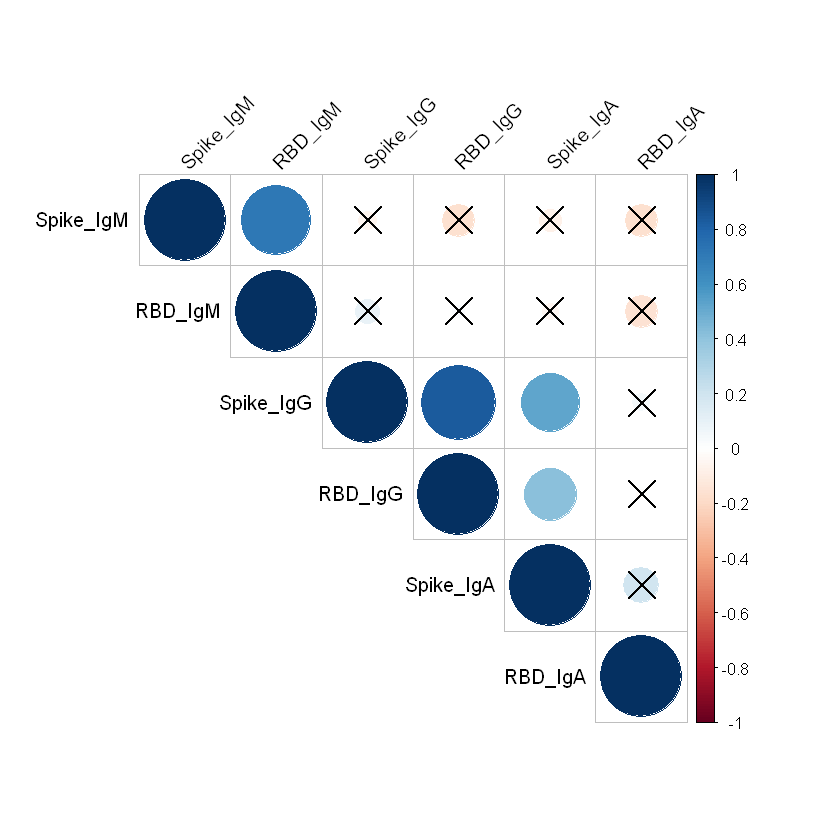

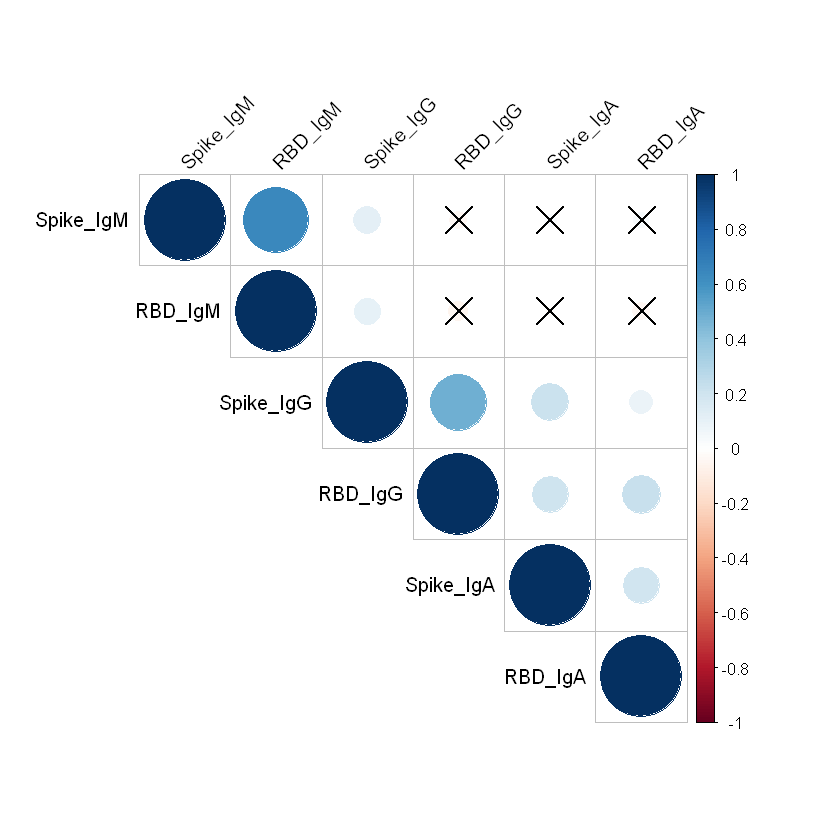

In [42]:
corr<-ddbb%>%
dplyr::select('Spike_IgM','RBD_IgM','Spike_IgG','RBD_IgG','Spike_IgA','RBD_IgA', "Global_posneg")
corr <- na.omit(corr)
#Log10 version because we see some outliers and the histogram is very skewed
vars<-c('Spike_IgM','RBD_IgM','Spike_IgG','RBD_IgG','Spike_IgA','RBD_IgA')
corr[vars]<-lapply(corr[vars],log10)
summary(corr)

corr.seropos<-corr %>% filter(Global_posneg=="pos") %>% dplyr::select(-Global_posneg)
plot <- rcorr(as.matrix(corr.seropos))
M <- plot$r
p_mat <- plot$P
corrplot(M, type = "upper", tl.col="black", tl.srt=45,
         p.mat = p_mat, sig.level = 0.05)# to order it:  order="hclust"

corr.seroneg<-corr %>% filter(Global_posneg=="neg") %>% dplyr::select(-Global_posneg)
plot <- rcorr(as.matrix(corr.seroneg))
M <- plot$r
p_mat <- plot$P
corrplot(M, type = "upper", tl.col="black", tl.srt=45,
         p.mat = p_mat, sig.level = 0.05)# to order it:  order="hclust"

In [43]:
#test normality after log
lapply(corr[vars], FUN=shapiro.test)

$Spike_IgM

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.97936, p-value = 1.231e-08


$RBD_IgM

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.8858, p-value < 2.2e-16


$Spike_IgG

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.72702, p-value < 2.2e-16


$RBD_IgG

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.83904, p-value < 2.2e-16


$Spike_IgA

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.59951, p-value < 2.2e-16


$RBD_IgA

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.91594, p-value < 2.2e-16



Data is not normal, because the nul hypothesis is normality, and we reject it. So we'll use Spearman correlation instead of Pearson.

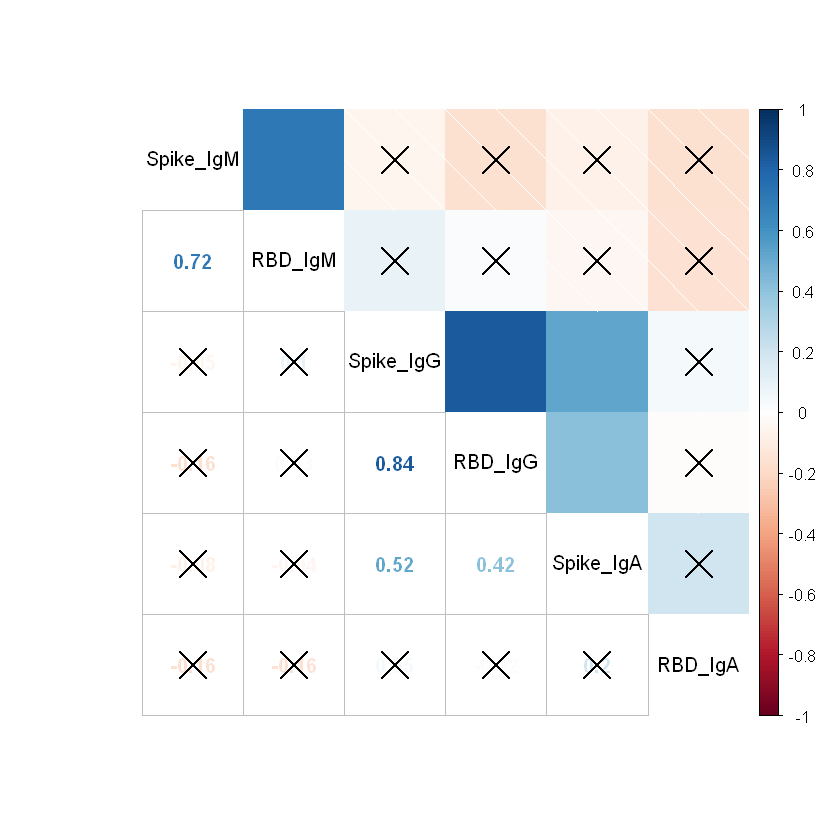

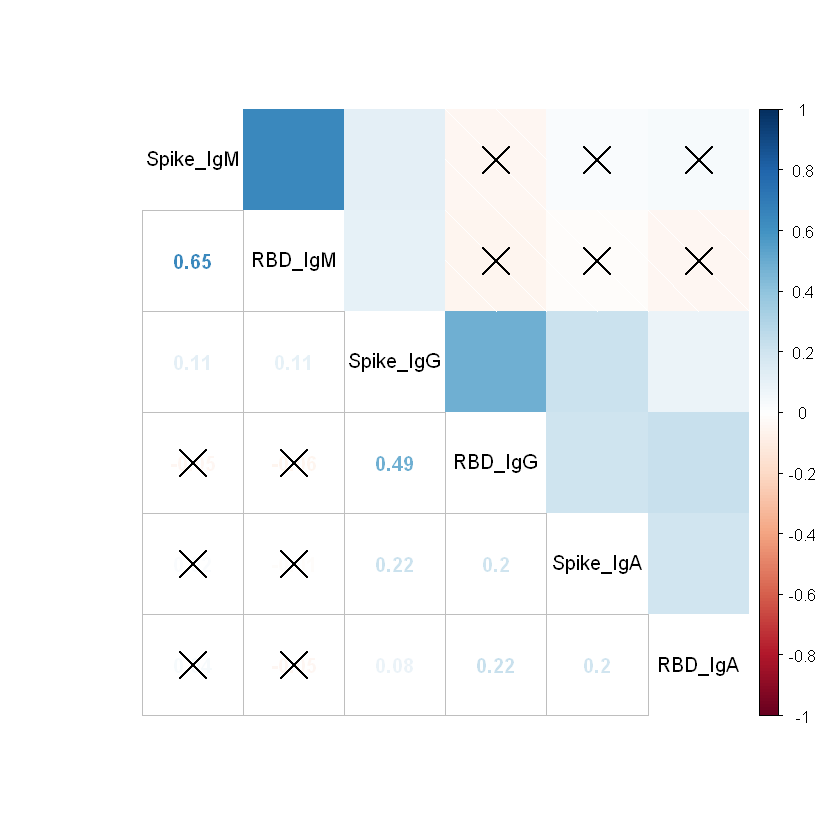

In [44]:
#Plot it with correlation coeff
corr.seropos<-corr %>% filter(Global_posneg=="pos") %>% dplyr::select(-Global_posneg)
plot <- rcorr(as.matrix(corr.seropos))
M <- plot$r
p_mat <- plot$P
corrplot.mixed(M, tl.col="black", upper = 'shade', p.mat = p_mat, sig.level = 0.05)# to order it:  order="hclust"


corr.seroneg<-corr %>% filter(Global_posneg=="neg") %>% dplyr::select(-Global_posneg)
plot <- rcorr(as.matrix(corr.seroneg))
M <- plot$r
p_mat <- plot$P
corrplot.mixed(M, tl.col="black", upper = 'shade', p.mat = p_mat, sig.level = 0.05)# to order it:  order="hclust"


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using for

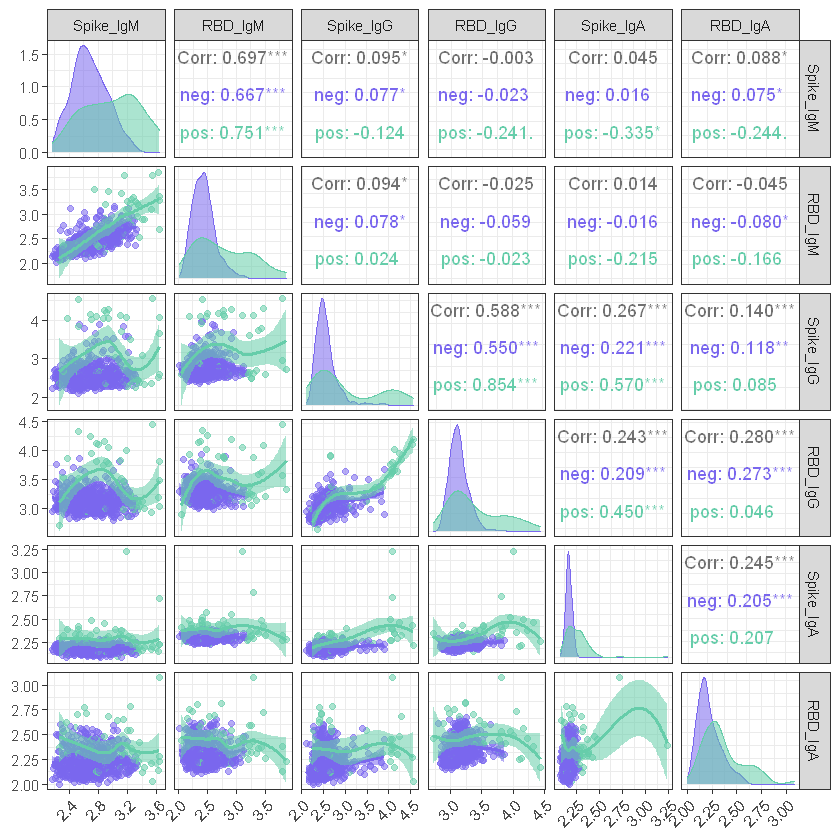

In [45]:
#Another way to plot it, with Spearman correlation values and plots and histograms (we separate in colors pos and neg)
data<-corr

#We have to create the function for loess before (copied from https://www.r-bloggers.com/2016/02/multiple-regression-lines-in-ggpairs/):
my_fn <- function(data, mapping, ...){
  p <- ggplot(data = data, mapping = mapping, aes(color=Global_posneg, fill=Global_posneg, alpha=0.005)) + 
    geom_point() + 
    geom_smooth(method=loess) 
  p
}


plot<- GGally::ggpairs(corr, columns=1:6, aes(color=Global_posneg, fill=Global_posneg, alpha=0.005), lower = list(continuous = my_fn), upper = list(continuous = wrap("cor", method = 'spearman'))) +
#plot<- GGally::ggpairs(corr, columns=1:6, aes(color=Global_posneg, fill=Global_posneg, alpha=0.005), lower = list(continuous = wrap("smooth"),method=c('loess','spearman'),se= TRUE, alpha=0.01,color="black")) +
  scale_color_manual(values=c( "slateblue2", "mediumaquamarine"))+  
  scale_fill_manual(values=c( "slateblue2",  "mediumaquamarine"))+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) #tilt the x titles
plot
#ggsave(plot, filename = "C:/Users/mribe/Documents/ESTUDIS/Master Global Health/Master Final Project/Seroprevalence of SARS-Cov-2 in Cizur/Paper Navarra/corr.png", width=8, height= 8)

For the seropos (n=56) RBD-IgM correlates with S-IgM, S-IgG correlates with RBD-IgG (so IgG istoypes show correlation of levels between the antigens but not IgA). Besides, S IgA correlates with S IgG and with RBD IgG. Expectedly, IgM levels do not correlate with IgG nor IgA.

For the seroneg (n=675) we find more significant correlations, which might be due to higher number of observations, although the strongest coincide with the ones found in the seropositive, although these are cross-reactive antibodies in theory not specific for an infection since they do not reach threshold of positivity.Levels against RBD and S within one isotype type correlate. Across isotypes, levels against S correlate between IgG and IgM and between IgG and IgA. Levels against RBD correlate between IgA and IgG. And across antigenes.

## Differences in symptomatology across participant sex

In [46]:
symp_sex<-(ddbb%>% 
           filter(Global_posneg=="pos")%>%
           dplyr::select(participantsex,symptom_groupfever_37, symptom_groupfever_38, symptom_groupchills,symptom_grouplost_smell, symptom_grouplost_taste, symptom_groupcough,symptom_groupshort_breath, symptom_groupdyspnea, symptom_groupexpectorations, symptom_groupwheeze, symptom_groupchest_pain, symptom_groupsore_throat,
                                symptom_grouprunny_nose,symptom_groupnausea,symptom_groupab_pain,symptom_groupdairrhea,symptom_groupfatigue,symptom_groupmuscle_ache,symptom_groupheadache))
dim(symp_sex)
st(symp_sex, group = "participantsex", group.test=TRUE, file="univariate_symp_gender.csv", out="csv") #to save it in a csv

[1] 56 20

Variable,N,Percent,N,Percent,Test
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
participantsex,female,,male,,
symptom_groupfever_37,31,,23,,X2=1.515
... no,28,90.3%,17,73.9%,
... yes,3,9.7%,6,26.1%,
symptom_groupfever_38,31,,25,,X2=0.556
... no,30,96.8%,22,88%,
... yes,1,3.2%,3,12%,
symptom_groupchills,31,,25,,X2=1.156
... no,27,87.1%,18,72%,


In [47]:
symp_sex<-(ddbb%>% 
           filter(Global_posneg=="pos")%>%
           dplyr::select(participantsex,symptom_groupfever_37, symptom_groupfever_38, symptom_groupchills,symptom_grouplost_smell, symptom_grouplost_taste, symptom_groupcough,symptom_groupshort_breath, symptom_groupdyspnea, symptom_groupexpectorations, symptom_groupwheeze, symptom_groupchest_pain, symptom_groupsore_throat,
                                symptom_grouprunny_nose,symptom_groupnausea,symptom_groupab_pain,symptom_groupdairrhea,symptom_groupfatigue,symptom_groupmuscle_ache,symptom_groupheadache))
dim(symp_sex)
st(symp_sex, group = "participantsex", group.test=TRUE, file="univariate_symp_gender_neg.csv", out="csv") #to save it in a csv

[1] 56 20

Variable,N,Percent,N,Percent,Test
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
participantsex,female,,male,,
symptom_groupfever_37,31,,23,,X2=1.515
... no,28,90.3%,17,73.9%,
... yes,3,9.7%,6,26.1%,
symptom_groupfever_38,31,,25,,X2=0.556
... no,30,96.8%,22,88%,
... yes,1,3.2%,3,12%,
symptom_groupchills,31,,25,,X2=1.156
... no,27,87.1%,18,72%,
